#### Alessia Taboga - Udacity Data Analyst Nanodegree, Project 2 (Investigate a Dataset)

# Project: Investigate the TMDb Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

In this project I will analyse the TMDb movie dataset provided by Udacity, as a modified/cleaned version of these original data from [kaggle](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata). This dataset contains information for approximately 10000 movies collected from The Movie Database (TMDb), including user ratings, budget and revenue. More specifically there are 21 columns:

- id: unique movie identifier
- imdb_id: another unique movie identifier
- popularity: popularity score
- budget: budget associated with the movie, possibly in USD dollars (not accounting for inflation)
- revenue: revenue associated with the movie, possibly in USD dollars (not accounting for inflation)
- original_title: original title of the movie
- cast: list of actor/s
- homepage: website address of the movie
- director: director/s name
- tagline: tagline of movie
- keywords: keyword for the movie
- overview: brief description of the movie
- runtime: runtime of the movie in minutes
- genres: one or more genres the movie belongs to
- production_companies: company or companies which produced the movie
- release_date: day of movie release
- vote_count: number of votes
- vote_average: average of rating
- release_year: year in which the movie was released
- budget_adj: budget associated with the movie, in terms of 2010 USD dollars, accounting for inflation over time
- revenue_adj: revenue associated with the movie, in terms of 2010 USD dollars, accounting for inflation over time

### Question(s) for Analysis
With this investigation I will try to answer two main questions:

__1. What kind of properties are associated with the movies that have high revenues?__

__2. How did genre popularity change over the years?__

In [1]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline

For this project, I set up an environment with Python 3.7 and jupyter, numpy, pandas, matplotlib, seaborn.

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In this section of the report, I load the data and check the dataframe for initial and general properties.

In [2]:
# Loading the data

df = pd.read_csv('tmdb-movies.csv')

In [3]:
# code to display all the columns in the dataframe

pd.set_option('display.max_columns', None)

In [4]:
# checking that loading was successful and inspecting the first rows of the dataframe

df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
# checking the last rows

df.tail(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,car|trolley|stealing car,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,spoof,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,fire|gun|drive|sacrifice|flashlight,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [6]:
# checking dataframe shape (number of rows and columns)

df.shape

(10866, 21)

The provided dataset contains __10866 rows (or samples/movies) and 21 columns__.

The list below shows the names of the columns.

In [7]:
# list of column names:

for i,v in enumerate(df.columns):
    print(i,v)

0 id
1 imdb_id
2 popularity
3 budget
4 revenue
5 original_title
6 cast
7 homepage
8 director
9 tagline
10 keywords
11 overview
12 runtime
13 genres
14 production_companies
15 release_date
16 vote_count
17 vote_average
18 release_year
19 budget_adj
20 revenue_adj


In [8]:
# summary of dataframe properties

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

An initial investigation (with .info()) shows that the __datatypes__ of the columns are:
- int64, for 6 columns: id, budget, revenue, runtime, vote_count, release_year;
- float64, for 4 columns: popularity, vote_average, budject_adj, revenue_adj;
- object, for 11 columns: imdb_id, orignal_title, cast, homepage, director, tagline, keywords, overview, genres, production_companies, release_date.

These datatypes will be investigated further later in the notebook to see if need changing. For example the release_date appears as object but should probably be converted to datetime.

There are __missing values__ (number of non-nulls less than 10866) in the following columns: 'imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'genres', 'production_companies'.
These missing values will be investigated further later in the notebook to chose the best approach to handle them.

The output of the code below shows the numbers of null values for each column. In particular, the column 'homepage' has most of the values missing (7930 out of 10866, which is almost 73%).

In [9]:
# total number of missing values for each column:

df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [10]:
# checking for duplicate rows

df.duplicated().sum()

1

In [11]:
# looking more into the duplicate row

df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [12]:
df[df['id'] == 42194]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


The dataset has one __duplicate row__ (for 'id' 42194, movie called 'TEKKEN' by Dwight H. Little). This row will be dropped in the cleaning section.

In [13]:
# some initial statistical summary of the original data (for numberical columns only):

df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


The table above shows a __summary of descriptive statistics__ for the numerical columns of the provided dataset. We can see for example that the movie 'release_year' ranges between 1960 and 2015, the 'vote_average' ranges between 1.5 and 9.2, while 'popularity' ranges from just above 0 to approximately 33. Moreover, we can see that 'budget', 'adjusted budget', 'revenue' and 'adjust revenue' must have many samples equal to 0 (0 shown on min, 25% and 50% quantiles). The maximum adjusted budget and adjusted revenue are approximantely 425000000 and 2830000000 USD respectively.

The various columns will be investigated more in detail here below before the data cleaning section.

##### Investigating each provided column (datatypes, missing values, descriptive statistics and distributions)

######  1 - Column 'id'

In [14]:
# number of unique values

df['id'].nunique()

10865

In [15]:
df['id'].value_counts().head(10)

42194     2
135397    1
9534      1
70476     1
44345     1
16358     1
20304     1
20544     1
18442     1
49870     1
Name: id, dtype: int64

The 'id' column is a integer number used as unique movie identifier. As seen earlier, there are two rows with same id (equal to 42194) only because of a duplicate row. This column will not provide useful information in terms of data analysis and the questions we are trying to answer. It could help however to distinguish between different movies having for example the same title.

##### 2 - Column 'imdb_id'

In [16]:
# example sample

df['imdb_id'][0]

'tt0369610'

In [17]:
# check that is a string (it was shown as object in .info()):

type(df['imdb_id'][0])

str

In [18]:
# number of unique values

df['imdb_id'].nunique()

10855

In [19]:
df['imdb_id'].value_counts().head(10)

tt0411951    2
tt0369610    1
tt0381442    1
tt0428441    1
tt0349416    1
tt0354766    1
tt0386792    1
tt0357585    1
tt0430484    1
tt0380687    1
Name: imdb_id, dtype: int64

In [20]:
# from .info() earlier, there are some missing values. Check:

df['imdb_id'].isnull().sum()

10

In [21]:
# looking into the 10 rows with missing values for imdb_id

df[df['imdb_id'].isnull()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
548,355131,NaN,0.108072,0,0,Sense8: Creating the World,Tuppence Middleton|Bae Doona |Brian J. Smith|A...,NaN,NaN,NaN,sexuality|superhuman|superpower|making of|soci...,NaN,25,Documentary|Science Fiction,Netflix,8/10/15,12,7.5,2015,0.000000,0.0
997,287663,NaN,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,NaN,Steward Lee|Steven G. Lee,NaN,NaN,"A Long Time Ago In A Galaxy Far, Far Awayâ€¦ A...",44,NaN,NaN,10/3/14,13,6.8,2014,0.000000,0.0
1528,15257,NaN,0.607851,0,0,Hulk vs. Wolverine,Fred Tatasciore|Bryce Johnson|Steve Blum|Nolan...,NaN,Frank Paur,NaN,marvel comic|superhero|wolverine|hulk|norse my...,Department H sends in Wolverine to track down ...,38,Animation|Action|Science Fiction,Marvel Studios,1/27/09,38,6.9,2009,0.000000,0.0
1750,101907,NaN,0.256975,0,0,Hulk vs. Thor,Graham McTavish|Fred Tatasciore|Matthew Wolf|J...,NaN,Sam Liu,A Battle Between God and Monster,marvel comic|superhero|hulk|norse mythology|su...,"For ages, Odin has protected his kingdom of As...",41,Action|Animation|Fantasy|Science Fiction,Marvel Studios,1/27/09,38,6.4,2009,0.000000,0.0
2401,45644,NaN,0.067753,0,0,Opeth: In Live Concert At The Royal Albert Hall,"Mikael Ã…kerfeldt|Martin ""Axe"" Axenrot|Martin ...",http://www.opeth.com,NaN,"The Loyal Disharmonic Orchestra, Conducted By ...",NaN,As part of the ongoing celebration of their 20...,163,Music,NaN,9/21/10,10,8.6,2010,0.000000,0.0
4797,369145,NaN,0.167501,0,0,Doctor Who: The Snowmen,Matt Smith|Jenna Coleman|Richard E. Grant|Ian ...,NaN,NaN,NaN,NaN,"Christmas Eve, 1892, and the falling snow is t...",60,NaN,BBC Television UK,12/25/12,10,7.8,2012,0.000000,0.0
4872,269177,NaN,0.090552,0,0,Party Bercy,Florence Foresti,NaN,NaN,NaN,NaN,Florence Foresti is offered Bercy tribute to a...,120,Comedy,TF1 VidÃ©o,9/23/12,15,6.4,2012,0.000000,0.0
6071,279954,NaN,0.004323,500,0,Portal: Survive!,Monique Blanchard|Bradley Mixon,https://www.kickstarter.com/projects/colinandc...,Connor McGuire|Colin McGuire,The Cake is a Lie,portal|aperture,"A short, live action fan film by Collin and Co...",7,Action|Science Fiction,NaN,10/8/13,11,7.5,2013,468.016676,0.0
7527,50127,NaN,0.570337,0,0,Fallen: The Journey,Paul Wesley|Fernanda Andrade|Tom Skerritt|Rick...,NaN,Mikael Salomon,NaN,NaN,"A year later, Aaron is still traveling around ...",80,Action|Adventure|Drama|Fantasy|Family,NaN,1/1/07,11,7.3,2007,0.000000,0.0
7809,50128,NaN,0.060795,0,0,Fallen: The Destiny,Paul Wesley|Fernanda Andrade|Tom Skerritt|Rick...,NaN,Mikael Salomon,NaN,NaN,"Aaron and Azazel defeat the Powers, and force ...",80,Adventure|Fantasy|Drama|Action|Science Fiction,NaN,1/1/07,13,7.0,2007,0.000000,0.0


The 'imdb_id' column is a mixed variable (a string with letters and numbers) used as unique movie identifier. There are two equal imdb_id numbers due to a duplicate row. There are 10 missing values (all having 0 revenue).

This column will not provide any useful information in terms of data analysis and the questions I am trying to answer and there is already another unique identifier ('id'). Therefore, this column will be dropped in the data cleaning section and there will be no need of handling these missing values.

##### 3 - Column 'popularity'

In [22]:
# statistical summary

df['popularity'].describe()

count    10866.000000
mean         0.646441
std          1.000185
min          0.000065
25%          0.207583
50%          0.383856
75%          0.713817
max         32.985763
Name: popularity, dtype: float64

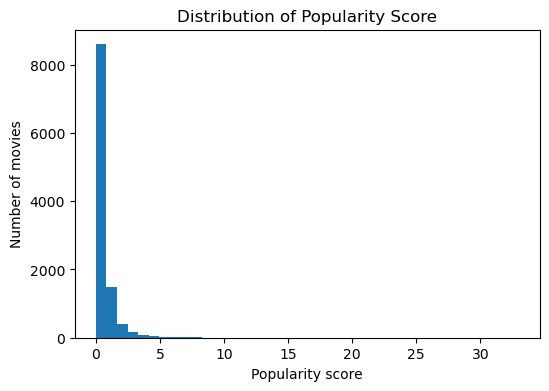

In [23]:
# Quick look at distribution of Popularity

df['popularity'].plot(kind='hist', bins=40, figsize=(6,4))
plt.title('Distribution of Popularity Score')
plt.xlabel('Popularity score', fontsize=10)
plt.ylabel('Number of movies', fontsize=10);

In [24]:
# median value for popularity

df['popularity'].median()

0.3838555

In [25]:
# most movies seem to have scores below 1;
# looking for example at the movies with popularity score above 15

df[df['popularity'] > 15]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
629,157336,tt0816692,24.949134,165000000,621752480,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,http://www.interstellarmovie.net/,Christopher Nolan,Mankind was born on Earth. It was never meant ...,saving the world|artificial intelligence|fathe...,Interstellar chronicles the adventures of a gr...,169,Adventure|Drama|Science Fiction,Paramount Pictures|Legendary Pictures|Warner B...,11/5/14,6498,8.0,2014,1.519800e+08,5.726906e+08


In [26]:
# title of those three most popular movies:

df[df['popularity'] > 15]['original_title']

0          Jurassic World
1      Mad Max: Fury Road
629          Interstellar
Name: original_title, dtype: object

From previous investigation, the column 'popularity' contains numerical values (float64) and has no missing values.

Descriptive statistics shows that scores are mainly below 1, with median of 0.3838555 and a maximum of 32.985763. Distribution is clearly skewed to the right. For example only 3 movies have values above 15 ('Jurassic World', 'Mad Max: Fury Road' and 'Interstellar'). Looking at imdb website pages, the popularity of a movie is related to the number of page views of pages related to that movie.

##### 4 - Columns 'budget' and 'budget_adj'

In [27]:
# example samples

df['budget'][0]

150000000

In [28]:
df['budget_adj'][0]

137999939.280026

In [29]:
# data types

type(df['budget'][0])

numpy.int64

In [30]:
type(df['budget_adj'][0])

numpy.float64

In [31]:
# looking at summary of statistics

df[['budget','budget_adj']].describe()

,budget,budget_adj
count,1.086600e+04,1.086600e+04
mean,1.462570e+07,1.755104e+07
std,3.091321e+07,3.430616e+07
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00
75%,1.500000e+07,2.085325e+07
max,4.250000e+08,4.250000e+08


In [32]:
# many movies seem to have budget and budget_adj equal to 0

df[df['budget'] == 0].count()['budget']

5696

In [33]:
df[df['budget_adj'] == 0].count()['budget_adj']

5696

In [34]:
# checking if they are 0 in both columns for the same rows (if so, output will give same 5696 as above)

df[(df['budget'] == 0) & (df['budget_adj'] == 0)].count()['budget']

5696

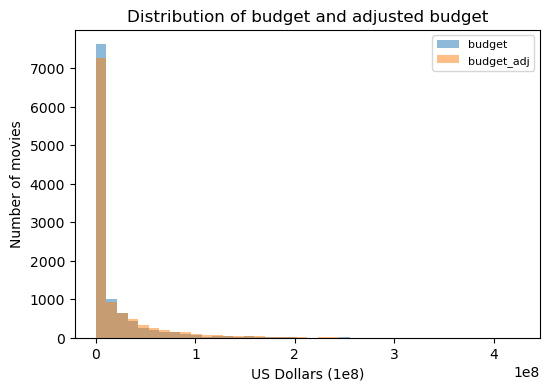

In [35]:
# distribution of the two columns:

fig, ax = plt.subplots(figsize=(6,4))
ax.hist(df['budget'], alpha=0.5, bins=40, label='budget')
ax.hist(df['budget_adj'], alpha=0.5, bins=40, label='budget_adj')
ax.set_title('Distribution of budget and adjusted budget')
ax.set_xlabel('US Dollars (1e8)', fontsize=10)
ax.set_ylabel('Number of movies', fontsize=10)
ax.legend(loc='upper right', fontsize=8)
plt.show();

In [36]:
# Investigating more the rows with 0 budget.
# looking for example at the first 10 movies with adjusted budget equal to 0
# sorted on adjusted revenue in descending order

df[df['budget_adj'] == 0].sort_values(by='revenue_adj', ascending=False).head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1342,11006,tt0076729,0.541642,0,126737428,Smokey and the Bandit,Burt Reynolds|Sally Field|Jerry Reed|Jackie Gl...,NaN,Hal Needham,What we have here is a total lack of respect f...,sheriff|bride|smuggling|road movie,A race car driver tries to transport an illega...,96,Action|Adventure|Comedy,Universal Pictures,5/26/77,93,6.9,1977,0.0,4.559735e+08
9467,9396,tt0092493,0.838320,0,239606210,Crocodile Dundee II,Paul Hogan|Linda Kozlowski|John Meillon|Ernie ...,NaN,John Cornell,The world's favourite adventurer is back for m...,new york|crocodile|australia|large knife|after...,Australian outback expert protects his New Yor...,110,Adventure|Comedy,Paramount Pictures,5/19/88,159,5.5,1988,0.0,4.418077e+08
10009,11092,tt0100404,0.548596,0,221303188,Presumed Innocent,Harrison Ford|Brian Dennehy|RaÃºl JuliÃ¡|Bonni...,NaN,Alan J. Pakula,NaN,loss of lover|lover (female)|investigation|law...,Life takes a nasty twist for D.A. Rusty Sabich...,127,Drama|Thriller|Crime|Mystery,Mirage Enterprises|Warner Bros.,7/26/90,59,6.3,1990,0.0,3.693326e+08
1381,14741,tt0076095,0.140163,0,102000000,The Goodbye Girl,Richard Dreyfuss|Marsha Mason|Quinn Cummings|P...,NaN,Herbert Ross,Thank you Neil Simon for making us laugh at fa...,theatre play,"Paula McFadden knows: In romance, actors all f...",111,Comedy|Romance,Rastar Pictures|Metro-Goldwyn-Mayer (MGM),11/30/77,10,6.5,1977,0.0,3.669737e+08
8914,2623,tt0084434,0.496761,0,129795554,An Officer and a Gentleman,"Richard Gere|Debra Winger|Louis Gossett, Jr.|D...",NaN,Taylor Hackford,"Life gave him nothing, except the courage to w...",love of one's life|navy|officer,Zack Mayo is a young man who has signed up for...,124,Drama|Romance,Paramount Pictures|Lorimar Film Entertainment,7/28/82,112,6.4,1982,0.0,2.932915e+08
8099,6950,tt0114069,1.041497,0,189859560,Outbreak,Dustin Hoffman|Rene Russo|Morgan Freeman|Kevin...,NaN,Wolfgang Petersen,This animal carries a deadly virus... and the ...,river|general|research|army|serum,A deadly airborne virus finds its way into the...,127,Action|Drama|Science Fiction|Thriller,Kopelson Entertainment|Punch Productions|Warne...,3/10/95,249,6.1,1995,0.0,2.716827e+08
7330,21629,tt0081562,0.427457,0,101300000,Stir Crazy,Gene Wilder|Richard Pryor|Georg Stanford Brown...,NaN,Sidney Poitier,Two jailbirds who just want out of the cage.,escape from prison|mistaken identity|fish out ...,"New Yorkers, Skip Donahue and Harry Monroe, ha...",111,Comedy,Columbia Pictures Corporation,12/12/80,59,6.7,1980,0.0,2.680435e+08
7470,11199,tt0486946,0.907749,0,253625427,Wild Hogs,Tim Allen|John Travolta|Martin Lawrence|Willia...,http://video.movies.go.com/wildhogs/,Walt Becker,A lot can happen on the road to nowhere.,politically incorrect|motorcycle gang|biker fi...,"Restless and ready for adventure, four suburba...",100,Action|Adventure|Comedy,Wild Hogs Productions|Touchstone Pictures,3/2/07,361,5.6,2007,0.0,2.667299e+08
10819,16214,tt0077696,0.044675,0,78000000,Hooper,Burt Reynolds|Robert Klein|Adam West|Jan-Micha...,http://en.wikipedia.org/wiki/Hooper_(film),Hal Needham,The greatest stuntman alive!,stuntman|hollywood,Burt Reynolds plays a legendary stunt man know...,107,Action|Comedy,Warner Bros.,7/28/78,13,6.0,1978,0.0,2.607307e+08
7838,11449,tt0078767,0.593218,0,86432000,The Amityville Horror,James Brolin|Margot Kidder|Rod Steiger|Don Str...,NaN,Stuart Rosenberg,"For God's Sake, Get Out!",haunted house|long island|indian burial ground...,"George Lutz and his wife Kathleen, move into t...",117,Drama|Horror|Thriller,American International Pictures (AIP),7/27/79,81,6.2,1979,0.0,2.596896e+08


As expected, the columns 'budget' and 'budget_adj' have a similar distribution (I assumed also 'budget' is in USD). They have no missing values, but many rows are filled with zeros. Looking for example at the movies with the highest adjusted revenues but an adjusted budget of 0 US dollars, it seems hard to believe that there was no budget. These zeros are most probably errors. They affect negatively the statistical analysis and the distribution graph above.

As 'budget' and 'budget_adj' have zeros for the same rows, we cannot use one to correct the other. The handling of the zero values will be discussed and carried out in the EDA section.

There will be no advantage in keeping both 'budget' and 'budget_adj' columns and would be negative for future processing such as machine learning engineering, as they are strongly correlated variables.
For this project, the 'budget' column will be dropped in the cleaning section. It is considered more appropriate for analysis to focus on the budget adjusted for inflation as it will allow fair comparisons between movies of different years.

##### 5 - Columns 'revenue' and 'revenue_adj'

This investigation is very similar to the one carried out for budget/budget_adj columns.

In [37]:
# example sample

df['revenue'][0]

1513528810

In [38]:
df['revenue_adj'][0]

1392445892.5238

In [39]:
# data types

type(df['revenue'][0])

numpy.int64

In [40]:
type(df['revenue_adj'][0])

numpy.float64

In [41]:
# summary statistics

df[['revenue','revenue_adj']].describe()

,revenue,revenue_adj
count,1.086600e+04,1.086600e+04
mean,3.982332e+07,5.136436e+07
std,1.170035e+08,1.446325e+08
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00
75%,2.400000e+07,3.369710e+07
max,2.781506e+09,2.827124e+09


In [42]:
# many movies seem to have a revenue and revenue_adj equal to 0

df[df['revenue'] == 0].count()['revenue']

6016

In [43]:
df[df['revenue_adj'] == 0].count()['revenue_adj']

6016

In [44]:
# checking if they are 0 in both columns for the same rows (output=6016 as above)

df[(df['revenue'] == 0) & (df['revenue_adj'] == 0)].count()['revenue']

6016

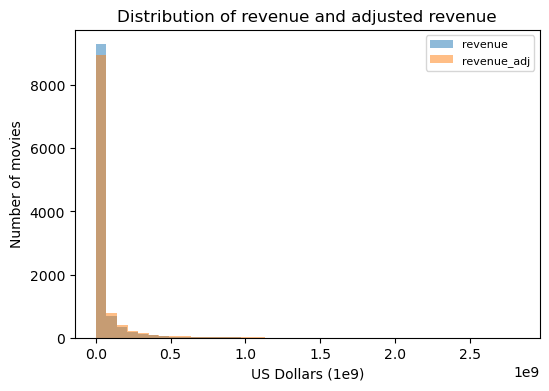

In [45]:
# distribution of the two columns:

fig, ax = plt.subplots(figsize=(6,4))
ax.hist(df['revenue'], alpha=0.5, bins=40, label='revenue')
ax.hist(df['revenue_adj'], alpha=0.5, bins=40, label='revenue_adj')
ax.set_title('Distribution of revenue and adjusted revenue')
ax.set_xlabel('US Dollars (1e9)', fontsize=10)
ax.set_ylabel('Number of movies', fontsize=10)
ax.legend(loc='upper right', fontsize=8)
plt.show();

In [46]:
# Investigating movies with 0 revenue.
# Looking for example at the first 10 movies with adjusted revenue equal to 0,
# sorted on popularity score in descending order

df[df['revenue_adj'] == 0].sort_values(by='popularity', ascending=False).head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3371,161337,tt2381375,8.411577,0,0,Underworld: Endless War,Trevor Devall|Brian Dobson|Paul Dobson|Laura H...,NaN,Juno John Lee,NaN,paris|france|vampire|night|woman with gun,Underworld: Endless War is a collection of thr...,18,Action|Animation|Horror,NaN,10/19/11,21,5.9,2011,0.000000e+00,0.0
5230,13590,tt0195753,6.668990,0,0,Eddie Izzard: Glorious,Eddie Izzard|Mac McDonald|Rhona Mitra,NaN,Peter Richardson,NaN,bible|stand up comedy|concert film|old testame...,Eddie Izzard's routine has a loose trajectory ...,99,Comedy,NaN,11/17/97,11,5.5,1997,0.000000e+00,0.0
667,72784,tt1850397,3.280948,13000000,0,The Loft,Karl Urban|James Marsden|Wentworth Miller|Matt...,NaN,Erik Van Looy,The right place to do wrong.,male friendship|murder|suspense|love affair|ap...,"For five men, the opportunity to share a penth...",108,Thriller,Dark Castle Entertainment|Anonymous Content|Op...,10/14/14,291,6.4,2014,1.197418e+07,0.0
48,265208,tt2231253,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,NaN,Simon West,Never bet against a man with a killer hand.,gambling|bodyguard|remake,When a Las Vegas bodyguard with lethal skills ...,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/15,481,5.3,2015,2.759999e+07,0.0
688,256092,tt2968804,2.493306,12000000,0,Drive Hard,Thomas Jane|John Cusack|Zoe Ventoura|Damien Ga...,NaN,Brian Trenchard-Smith,One Hell of A Ride,NaN,A former race car driver is abducted by a myst...,96,Action|Comedy|Crime,Odyssey Media|Silver Wings Films,5/26/14,52,4.0,2014,1.105309e+07,0.0
5237,25571,tt0116147,2.407266,3500000,0,Drive,Mark Dacascos|Kadeem Hardison|John Pyper-Fergu...,NaN,Steve Wang,There ain't no cruise control.,electromagnetic pulse|virtual reality|independ...,"Drive follows Toby Wong (Mark Dacascos), whose...",100,Action|Adventure|Science Fiction|Comedy,Overseas FilmGroup,8/4/97,10,6.3,1997,4.754611e+06,0.0
67,334074,tt3247714,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,http://survivormovie.com/,James McTeigue,His Next Target is Now Hunting Him,new year's eve|fire|showdown|terrorist|embassy,A Foreign Service Officer in London tries to p...,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015,1.839999e+07,0.0
10439,9078,tt0057546,2.180410,0,0,The Sword in the Stone,Sebastian Cabot|Karl Swenson|Junius Matthews|N...,NaN,Wolfgang Reitherman,Tired of living in a Medieval mess...Merlin us...,kÃ¶nig arthur|merlin|knight|king arthur,Wart is a young boy who aspires to be a knight...,79,Animation|Family,Walt Disney Productions,12/25/63,486,6.7,1963,0.000000e+00,0.0
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,sword|magic|sorcery|necromancer|woman director,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.000000e+00,0.0
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,tattoo|high school|leukemia|friends|parody,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.000000e+00,0.0


In [47]:
# looking for example at the first 10 movies with adjusted revenue equal to 0,
# sorted on vote_average score in descending order

df[df['revenue_adj'] == 0].sort_values(by='vote_average', ascending=False).head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3894,125336,tt2044056,0.006925,0,0,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,http://www.channel4.com/programmes/the-story-o...,Mark Cousins,NaN,cinema|nouvelle vague|hindi cinema|cinema novo...,"The Story of Film: An Odyssey, written and dir...",900,Documentary,NaN,9/3/11,14,9.2,2011,0.0,0.0
538,224972,tt3983674,0.114264,0,0,The Mask You Live In,NaN,http://themaskyoulivein.org,Jennifer Siebel Newsom,"Is american masculinity harming our boys, men ...",feminism|sexism|young boy|gender roles|misogyny,"Compared to girls, research shows that boys in...",88,Documentary,NaN,1/1/15,11,8.9,2015,0.0,0.0
2269,51299,tt1828232,0.222293,0,0,Life Cycles,NaN,http://www.lifecyclesfilm.com/,Derek Frankowski,NaN,sport|cycling,Life Cycles tells a spectacular story of the b...,47,Documentary,NaN,10/2/10,27,8.8,2010,0.0,0.0
1200,374430,tt3973198,0.129531,0,0,Black Mirror: White Christmas,Jon Hamm|Rafe Spall|Oona Chaplin|Natalia Tena|...,NaN,Carl Tibbetts,NaN,artificial intelligence|confession|technology|...,This feature-length special consists of three ...,74,Drama|Horror|Mystery|Science Fiction|Thriller,NaN,12/16/14,41,8.8,2014,0.0,0.0
6911,24970,tt0110758,0.212010,0,0,Pink Floyd: Pulse,David Gilmour|Nick Mason|Richard Wright|Sam Br...,NaN,David Mallet,NaN,live concert,Pulse (stylized as Pâ€¢Uâ€¢Lâ€¢Sâ€¢E) is a Pin...,145,Music,SMV Enterprises|Columbia Music Video|EMI,7/9/06,23,8.7,2006,0.0,0.0
2401,45644,NaN,0.067753,0,0,Opeth: In Live Concert At The Royal Albert Hall,"Mikael Ã…kerfeldt|Martin ""Axe"" Axenrot|Martin ...",http://www.opeth.com,NaN,"The Loyal Disharmonic Orchestra, Conducted By ...",NaN,As part of the ongoing celebration of their 20...,163,Music,NaN,9/21/10,10,8.6,2010,0.0,0.0
8411,25093,tt1421377,0.302908,0,0,Queen - Rock Montreal,Freddie Mercury|Roger Taylor|John Deacon|Brian...,NaN,Saul Swimmer,NaN,live concert,The only Queen concert ever filmed in its enti...,138,Music,Edel records GmbH,11/24/81,14,8.5,1981,0.0,0.0
8839,16275,tt0251654,0.157001,0,0,Dave Chappelle: Killin' Them Softly,Dave Chappelle,NaN,Stan Lathan,NaN,stand-up|stand up comedy,Dave Chappelle returns for a stand-up to D.C. ...,57,Comedy,NaN,1/1/00,17,8.5,2000,0.0,0.0
5830,282848,tt2986512,0.248944,0,0,Doctor Who: The Time of the Doctor,Matt Smith|Jenna Coleman,NaN,James Payne,A change is going to come...,NaN,"Orbiting a quiet backwater planet, the massed ...",60,NaN,NaN,12/25/13,26,8.5,2013,0.0,0.0
8221,55676,tt0112120,0.194889,0,0,A Personal Journey with Martin Scorsese Throug...,Martin Scorsese|Brian De Palma|Gregory Peck|Fr...,NaN,Martin Scorsese|Michael Henry Wilson,NaN,NaN,Martin Scorsese celebrates American movies fro...,225,Documentary,Miramax Films|British Film Institute (BFI),5/21/95,11,8.5,1995,0.0,0.0


In [48]:
# looking for example at the first 10 movies with adjusted revenue equal to 0,
# sorted on budget_adj in descending order

df[df['revenue_adj'] == 0].sort_values(by='budget_adj', ascending=False).head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2069,7978,tt0780653,0.642475,150000000,0,The Wolfman,Benicio del Toro|Anthony Hopkins|Emily Blunt|H...,http://www.thewolfmanmovie.com/,Joe Johnston,When the moon is full the legend comes to life,father-son relationship|victorian england|rura...,"Lawrence Talbot, an American man on a visit to...",102,Horror|Thriller|Drama,Universal Pictures|Stuber Productions|Relativi...,2/11/10,299,5.4,2010,1.500000e+08,0.0
10684,33157,tt0066549,0.092150,25000000,0,Waterloo,Rod Steiger|Christopher Plummer|Orson Welles|J...,NaN,Sergey Bondarchuk,NaN,napoleon bonaparte,After defeating France and imprisoning Napoleo...,128,Action|Drama|Foreign|History,Dino de Laurentiis Cinematografica|Mosfilm,10/26/70,10,6.2,1970,1.404092e+08,0.0
5265,10357,tt0120461,0.999866,90000000,0,Volcano,Tommy Lee Jones|Anne Heche|Gaby Hoffmann|Don C...,NaN,Mick Jackson,The coast is toast,subway|lava|volcano|volcanologist|los angeles,An earthquake shatters a peaceful Los Angeles ...,104,Science Fiction|Action|Drama|Thriller,Twentieth Century Fox Film Corporation,4/25/97,172,5.0,1997,1.222614e+08,0.0
10824,2525,tt0060164,0.533292,18000000,0,The Bible: In the Beginning...,Michael Parks|Ulla Bergryd|Richard Harris|Fran...,NaN,John Huston,The unforgettable adventure of Man from the Cr...,bible|christian|flood|noah|noah's ark,Extravagant production of the first part of th...,174,Drama,Seven Arts Productions|Dino de Laurentiis Cine...,9/28/66,18,5.8,1966,1.209243e+08,0.0
9036,9822,tt0120751,0.651772,90000000,0,Mighty Joe Young,Charlize Theron|Rade Serbedzija|Bill Paxton|Re...,NaN,Ron Underwood,Survival is an instinct.,gorilla|dying and death,"As a child living in Africa, Jill Young saw he...",114,Action|Adventure|Family|Fantasy,Walt Disney Pictures|RKO Pictures,12/25/98,112,5.9,1998,1.203926e+08,0.0
2214,189197,tt0374463,0.757082,120000000,0,The Pacific,James Badge Dale|Joseph Mazzello|Jon Seda|Asht...,http://www.hbo.com/the-pacific/index.html,Jeremy Podeswa|Tim Van Patten|David Nutter|Gra...,Hell was an ocean away,world war ii|tv mini-series|hbo,"A 10-part mini-series from the creators of ""Ba...",540,War|Drama|Action|Adventure|History,Playtone|HBO|DreamWorks Television,5/16/10,183,7.8,2010,1.200000e+08,0.0
5314,12499,tt0119109,0.536259,85000000,0,Fathers' Day,Robin Williams|Billy Crystal|Julia Louis-Dreyf...,NaN,Ivan Reitman,NaN,law|paternity|friendship|run away|teen angst,After Scott has a fight with his father and ru...,89,Comedy|Family,Silver Pictures|Warner Bros.|Northern Lights E...,5/9/97,39,5.1,1997,1.154691e+08,0.0
9931,12335,tt0066817,0.630778,20000000,0,Bedknobs and Broomsticks,Angela Lansbury|David Tomlinson|Roddy McDowall...,NaN,Robert Stevenson,You'll beWITCHED! You'll beDAZZLED! You'll be ...,flying|witch|world war ii|magic broomstick,Three children evacuated from London during Wo...,117,Adventure|Fantasy|Animation|Comedy|Family,Walt Disney Productions,10/7/71,137,6.6,1971,1.077039e+08,0.0
8732,9678,tt0185431,0.561897,85000000,0,Little Nicky,Adam Sandler|Patricia Arquette|Harvey Keitel|R...,NaN,Steven Brill,He's Never Been To Earth. He's Never Even Slep...,father-son relationship|mephisto|siblings|bull...,After the lord of darkness decides he will not...,90,Comedy|Fantasy|Romance,New Line Cinema|Avery Pix|Happy Madison Produc...,11/10/00,237,5.2,2000,1.076348e+08,0.0
2462,11374,tt0131369,0.740133,80000000,0,Edtv,Matthew McConaughey|Woody Harrelson|Sally Kirk...,NaN,Ron Howard,Fame. Be careful. It's out there.,tv show|tv station|simulated reality |reality ...,Video store clerk Ed agrees to have his life f...,122,Comedy,Imagine Entertainment|Universal Pictures,3/26/99,69,5.4,1999,1.047242e+08,0.0


Similarly to observations made for 'budget' and 'budget_adj', also for 'revenue' and 'revenue_adj' there are many movies with zeros (and the same rows, so one column cannot be used to infer the other). Again these zeros appear to be most probably errors in the dataset. Looking for example at the 10 movies with zero adjusted revenue, but either highest popularity, vote average or adjusted budget, it is hard to believe they did not have any revenue.

At this initial stage, statistics and distribution graph are clearly negatively and strongly affected by the presence of the zeros.

The handling of the zeros will be discussed and carried out in the EDA section.

Similarly to discussion for 'budget', only the column 'revenue_adj' will be kept for further analysis, while 'revenue' will be dropped in the data cleaning section.

##### 6 - Column 'original_title'

In [49]:
# example sample

df['original_title'][0]

'Jurassic World'

In [50]:
# data type is string as seen from this command:

type(df['original_title'][0])

str

In [51]:
# looking at number of unique titles

df['original_title'].nunique()

10571

In [52]:
# some movies could seem to have different titles due to lower and upper case differences

df['original_title'].str.lower().nunique()

10566

The number of unique values with lower case function implemented is not the same. So some movies appear to have a different title just due to differences in upper- lower- case.

In [53]:
# looking if there are movies with same original title, in lower case
# (keeping the first 15)

df['original_title'].str.lower().value_counts().head(15)

hamlet                  4
life                    3
a christmas carol       3
alice in wonderland     3
oliver twist            3
julia                   3
the three musketeers    3
carrie                  3
hercules                3
shelter                 3
beauty and the beast    3
the black hole          3
annie                   3
emma                    3
frankenstein            3
Name: original_title, dtype: int64

In [54]:
# looking for example into movie 'Hamlet' which appears 4 times

df[(df['original_title'] == 'Hamlet') | (df['original_title'] == 'hamlet')]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1890,28238,tt1449175,0.086490,0,0,Hamlet,David Tennant|Patrick Stewart|Penny Downie|Oli...,http://www.bbc.co.uk/hamlet/,Gregory Doran,"To be, or not to be?",shakespeare adaptation|based on play,David Tennant stars in a film of the Royal Sha...,185,Drama,NHK Enterprises|Illuminations|BBC Wales,12/26/09,13,6.4,2009,0.000000e+00,0.000000e+00
8573,10549,tt0116477,0.383469,0,0,Hamlet,Kenneth Branagh|Derek Jacobi|Julie Christie|Ri...,NaN,Kenneth Branagh,NaN,mother|denmark|loss of father|prince|shakespea...,"Hamlet, Prince of Denmark, returns home to fin...",242,Drama,Castle Rock Entertainment|Turner Pictures (I),12/25/96,51,6.7,1996,0.000000e+00,0.000000e+00
8797,10688,tt0171359,0.277798,2000000,1568749,Hamlet,Ethan Hawke|Kyle MacLachlan|Diane Venora|Sam S...,NaN,Michael Almereyda,"Passion, Betrayal, Revenge, A hostile takeover...",shakespeare|loss of lover|loss of father|fathe...,Modern day adaptation of Shakespeare's immorta...,112,Drama,Miramax Films|double A Films,5/12/00,18,5.0,2000,2.532584e+06,1.986494e+06
10106,10264,tt0099726,0.067973,0,20710451,Hamlet,Mel Gibson|Glenn Close|Alan Bates|Paul Scofiel...,NaN,Franco Zeffirelli,The extraordinary adaptation of Shakespeare's ...,loss of father|prince|uncle|revenge|murder,"Hamlet, Prince of Denmark, finds out that his ...",130,Drama|History,Icon Productions|Warner Bros. Pictures|Nelson ...,12/19/90,43,6.5,1990,0.000000e+00,3.456364e+07


The 'original_title' column contains the movie title as a string. There are no missing values. Some different movies can have the same original title (and movies can be distinguished by other features, such as different 'id', 'director', 'cast').

Differences in title can be due to upper- or lower- case differences. The name of the movies will be made all lower case in the data cleaning section.

##### 7 - Column 'cast'

In [55]:
# example sample

df['cast'][0]

"Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent D'Onofrio|Nick Robinson"

In [56]:
# checking type, showing as object in .info():

type(df['cast'][0])

str

In [57]:
# from initial .info() inspection, there are some missing values.
# check:

df['cast'].isnull().sum()

76

In [58]:
df[df['cast'].isnull()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
371,345637,tt4661600,0.422901,0,0,Sanjay's Super Team,NaN,NaN,Sanjay Patel,NaN,NaN,Sanjay's Super Team follows the daydream of a ...,7,Animation,Pixar Animation Studios,11/25/15,47,6.9,2015,0.000000,0.0
441,355020,tt4908644,0.220751,0,0,Winter on Fire: Ukraine's Fight for Freedom,NaN,http://www.netflix.com/title/80031666,Evgeny Afineevsky,The Next Generation Of Revolution,NaN,A documentary on the unrest in Ukraine during ...,98,Documentary,Passion Pictures|Campbell Grobman Films|Afinee...,10/9/15,37,8.2,2015,0.000000,0.0
465,321109,tt4393514,0.201696,0,0,Bitter Lake,NaN,NaN,Adam Curtis,NaN,manipulation|politics|war|control|fear,An experimental documentary that explores Saud...,135,Documentary,BBC,1/24/15,19,7.8,2015,0.000000,0.0
536,333350,tt3762974,0.122543,0,0,A Faster Horse,NaN,NaN,David Gelb,NaN,mustang|car|corporation|henry ford family|car ...,David Gelb (Jiro Dreams of Sushi) tackles anot...,90,Documentary,NaN,10/8/15,12,8.0,2015,0.000000,0.0
538,224972,tt3983674,0.114264,0,0,The Mask You Live In,NaN,http://themaskyoulivein.org,Jennifer Siebel Newsom,"Is american masculinity harming our boys, men ...",feminism|sexism|young boy|gender roles|misogyny,"Compared to girls, research shows that boys in...",88,Documentary,NaN,1/1/15,11,8.9,2015,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9677,13926,tt0093832,0.253376,0,0,Red's Dream,NaN,NaN,John Lasseter,NaN,NaN,Life as the sole sale item in the clearance co...,4,Animation,Pixar Animation Studios,8/17/87,44,6.6,1987,0.000000,0.0
9755,48714,tt0061402,0.046272,0,0,The Big Shave,NaN,NaN,Martin Scorsese,NaN,NaN,This short film is a metaphor for the Vietnam ...,6,Drama,NaN,1/1/68,12,6.7,1968,0.000000,0.0
10434,48784,tt0060984,0.146906,200,0,Six Men Getting Sick,NaN,NaN,David Lynch,NaN,student movie|short,Lynch's first film project consists of a loop ...,4,Animation,Pensylvania Academy of Fine Arts,1/1/67,16,5.2,1967,1307.352748,0.0
10550,13925,tt0091455,0.306425,0,0,Luxo Jr.,NaN,http://www.pixar.com/short_films/Theatrical-Sh...,John Lasseter,NaN,pixar animated short|luxo lamps|beach ball|fat...,A baby lamp finds a ball to play with and it's...,2,Animation|Family,Pixar Animation Studios,8/17/86,81,7.3,1986,0.000000,0.0


In [59]:
# From quick look at the rows above, there could be 0 adjusted revenue for these rows.
# Check for example how many of the 76 rows with Null cast have also 0 adjusted revenue:

df[(df['cast'].isnull()) & (df['revenue_adj'] == 0)].count()['id']

71

In [60]:
# check  how many of the 76 rows with Null cast have also 0 adjusted budget

df[(df['cast'].isnull()) & (df['budget_adj'] == 0)].count()['id']

65

In [61]:
# number of unique rows for casts

df['cast'].nunique()

10719

In [62]:
# 10 most common cast full strings

df['cast'].value_counts().head(10)

Louis C.K.                                                                          6
William Shatner|Leonard Nimoy|DeForest Kelley|James Doohan|George Takei             5
Bill Burr                                                                           4
Aziz Ansari                                                                         3
Elijah Wood|Ian McKellen|Viggo Mortensen|Liv Tyler|Orlando Bloom                    3
Jim Jefferies                                                                       3
Jennifer Lawrence|Josh Hutcherson|Liam Hemsworth|Woody Harrelson|Elizabeth Banks    3
Pierre Coffin                                                                       3
Zac Efron|Vanessa Hudgens|Ashley Tisdale|Lucas Grabeel|Corbin Bleu                  3
Sylvester Stallone|Talia Shire|Burt Young|Carl Weathers|Burgess Meredith            3
Name: cast, dtype: int64

The 'column' cast contains strings of one actor name or more actor names separated by pipe character ('|').

There are 76 missing values, which could eventually be filled by finding information elsewhere on the internet on the basis of the movie title, director and year. This is beyond the scope of this project.
For analysis involving this column, due to the limited number of missing values (76 over 10866 rows), the rows with nulls could be dropped. Most of the rows with these missing values have also 0s in adjusted revenue (71 out of 76) and adjusted budget (65 out of 76).

As the actor names are separted by pipes, proper analysis focusing on actors would require splitting of the cells based on '|'. For example, the 10 most common strings identified with .value_counts() above do not take into consideration that the same actor can appear alone or in different string combinations.

##### 8 - Column 'homepage'

In [63]:
# example sample

df['homepage'][0]

'http://www.jurassicworld.com/'

In [64]:
# .info() showed this as a object. Check that is a string:

type(df['homepage'][0])

str

In [65]:
df['homepage'].nunique()

2896

In [66]:
# 10 most common values:

df['homepage'].value_counts().head(10)

http://www.thehungergames.movie/        4
http://www.missionimpossible.com/       4
http://phantasm.com                     4
http://www.transformersmovie.com/       3
http://www.thehobbit.com/               3
http://www.americanreunionmovie.com/    3
http://www.georgecarlin.com             3
http://www.kungfupanda.com/             3
http://www.jeffdunham.com               3
http://www.indianajones.com             2
Name: homepage, dtype: int64

In [67]:
# the .info() showed many missing values for this column. Check here:

df['homepage'].isnull().sum()

7930

In [68]:
df[df['homepage'].isnull()].head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
18,150689,tt1661199,5.556818,95000000,542351353,Cinderella,Lily James|Cate Blanchett|Richard Madden|Helen...,NaN,Kenneth Branagh,Midnight is just the beginning.,cinderella|magic|fairy tale|princess|shoe,"When her father unexpectedly passes away, youn...",112,Romance|Fantasy|Family|Drama,Walt Disney Pictures|Genre Films|Beagle Pug Fi...,3/12/15,1495,6.8,2015,8.739996e+07,4.989630e+08
21,307081,tt1798684,5.337064,30000000,91709827,Southpaw,Jake Gyllenhaal|Rachel McAdams|Forest Whitaker...,NaN,Antoine Fuqua,Believe in Hope.,sport,"Billy ""The Great"" Hope, the reigning junior mi...",123,Action|Drama,Escape Artists|Riche-Ludwig Productions,6/15/15,1386,7.3,2015,2.759999e+07,8.437300e+07
26,214756,tt2637276,4.564549,68000000,215863606,Ted 2,Mark Wahlberg|Seth MacFarlane|Amanda Seyfried|...,NaN,Seth MacFarlane,"Ted is Coming, Again.",sperm bank|sequel|buddy|courthouse|teddy bear,Newlywed couple Ted and Tami-Lynn want to have...,115,Comedy,Universal Pictures|Media Rights Capital|Fuzzy ...,6/25/15,1666,6.3,2015,6.255997e+07,1.985944e+08
32,254470,tt2848292,3.877764,29000000,287506194,Pitch Perfect 2,Anna Kendrick|Rebel Wilson|Hailee Steinfeld|Br...,NaN,Elizabeth Banks,We're back pitches,music|sequel|singer|male female relationship|a...,"The Bellas are back, and they are better than ...",115,Comedy|Music,Universal Pictures|Gold Circle Films|Brownston...,5/7/15,1264,6.8,2015,2.667999e+07,2.645056e+08
33,296098,tt3682448,3.648210,40000000,162610473,Bridge of Spies,Tom Hanks|Mark Rylance|Amy Ryan|Alan Alda|Seba...,NaN,Steven Spielberg,"In the shadow of war, one man showed the world...",spy|cia|cold war|pilot|lawyer,"During the Cold War, the Soviet Union captures...",141,Thriller|Drama,DreamWorks SKG|Amblin Entertainment|Studio Bab...,10/15/15,1638,7.1,2015,3.679998e+07,1.496016e+08
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",thriller|serial killer|psychic|fbi agent|intrigue,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.000000e+00,2.056620e+07
38,241554,tt2199571,3.237370,50000000,71561644,Run All Night,Liam Neeson|Ed Harris|Joel Kinnaman|Boyd Holbr...,NaN,Jaume Collet-Serra,No sin goes unpunished,hitman|revenge|murder|on the run|mobster,Brooklyn mobster and prolific hit man Jimmy Co...,114,Action|Crime|Drama|Mystery|Thriller,Vertigo Entertainment|Energy Entertainment|Rat...,3/11/15,814,6.3,2015,4.599998e+07,6.583668e+07
43,203801,tt1638355,3.053421,75000000,108145109,The Man from U.N.C.L.E.,Henry Cavill|Armie Hammer|Alicia Vikander|Eliz...,NaN,Guy Ritchie,Saving the world never goes out of style.,spy|cold war|remake|based on tv series|buddy cop,"At the height of the Cold War, a mysterious cr...",116,Comedy|Action|Adventure,Davis Entertainment|Warner Bros.|Wigram Produc...,8/13/15,1548,7.0,2015,6.899997e+07,9.949346e+07
47,286565,tt3622592,2.968254,12000000,85512300,Paper Towns,Nat Wolff|Cara Delevingne|Halston Sage|Justice...,NaN,Jake Schreier,Get Lost. Get Found.,friendship|high school|teen|classmate|based on...,Quentin Jacobsen has spent a lifetime loving t...,109,Drama|Mystery|Romance,Fox 2000 Pictures,7/9/15,1252,6.2,2015,1.104000e+07,7.867128e+07
48,265208,tt2231253,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,NaN,Simon West,Never bet against a man with a killer hand.,gambling|bodyguard|remake,When a Las Vegas bodyguard with lethal skills ...,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/15,481,5.3,2015,2.759999e+07,0.000000e+00


In [69]:
# statistics of rows with Null value for homepage

df[df['homepage'].isnull()].describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,7930.000000,7930.000000,7.930000e+03,7.930000e+03,7930.000000,7930.000000,7930.000000,7930.000000,7.930000e+03,7.930000e+03
mean,59352.931526,0.515648,1.086750e+07,2.467183e+07,101.881463,128.493190,5.906772,1998.660025,1.443021e+07,3.669747e+07
std,88213.303898,0.575551,2.255996e+07,6.740459e+07,29.992706,307.224465,0.923077,13.485237,2.828371e+07,9.943517e+07
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10427.250000,0.200833,0.000000e+00,0.000000e+00,90.000000,16.000000,5.300000,1991.000000,0.000000e+00,0.000000e+00
50%,17642.000000,0.354689,0.000000e+00,0.000000e+00,98.000000,32.000000,6.000000,2002.000000,0.000000e+00,0.000000e+00
75%,53967.500000,0.617663,1.200000e+07,1.555300e+07,111.000000,98.000000,6.500000,2010.000000,1.697166e+07,2.372729e+07
max,417859.000000,8.411577,2.250000e+08,1.106280e+09,877.000000,5754.000000,8.800000,2015.000000,2.504192e+08,1.583050e+09


In [70]:
# statistics of rows with filled homepage

df[df['homepage'].isnull() == False].describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,2936.000000,2936.000000,2.936000e+03,2.936000e+03,2936.000000,2936.000000,2936.000000,2936.000000,2.936000e+03,2.936000e+03
mean,84190.941757,0.999706,2.477644e+07,8.074679e+07,102.582425,457.495232,6.158992,2008.514305,2.598025e+07,9.097896e+07
std,99743.489127,1.623969,4.496026e+07,1.900219e+08,34.857158,944.752631,0.942822,6.750643,4.580666e+07,2.203991e+08
min,11.000000,0.000620,0.000000e+00,0.000000e+00,0.000000,10.000000,2.100000,1961.000000,0.000000e+00,0.000000e+00
25%,12813.000000,0.236623,0.000000e+00,0.000000e+00,90.000000,22.000000,5.600000,2007.000000,0.000000e+00,0.000000e+00
50%,42179.500000,0.502230,2.951330e+06,8.735265e+05,100.000000,81.000000,6.200000,2010.000000,3.000000e+06,9.153012e+05
75%,114538.000000,1.138305,3.000000e+07,6.870492e+07,113.000000,400.000000,6.800000,2012.000000,3.205000e+07,7.314472e+07
max,414419.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


The column 'homepage' contains the webiste address of the homepage of the movie, as a string. There are many missing values (7930 out of 10899 rows have no value).

There are missing values of homepage not only for very old movies, but also for recent ones. Most probably this column has just not been filled in consistently, at random (no obvious link to revenue, popularity and votes looking at descriptive statistics).

Due to the amount of missing values and the fact that this column is not essential for answering the project questions, it will be dropped in the data cleaning section.

##### 9 - Column 'director'

In [71]:
# example sample

df['director'][0]

'Colin Trevorrow'

In [72]:
# check if the type is string, as .info() showed object

type(df['director'][0])

str

In [73]:
# check number of different values

df['director'].nunique()

5067

In [74]:
# looking for example at the 10 most common directors

df['director'].value_counts().head(10)

Woody Allen          45
Clint Eastwood       34
Martin Scorsese      29
Steven Spielberg     29
Ridley Scott         23
Steven Soderbergh    22
Ron Howard           22
Joel Schumacher      21
Brian De Palma       20
Tim Burton           19
Name: director, dtype: int64

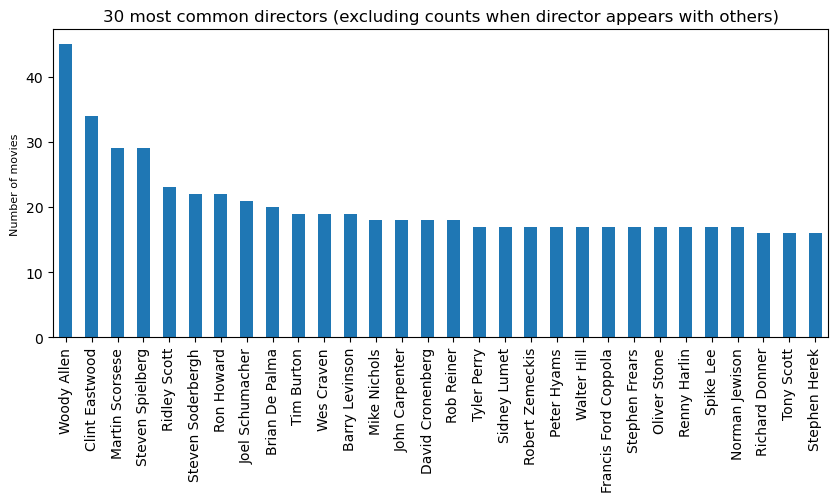

In [75]:
# Approximate distribution of directors -- looking at the 30 most common,
# but not taking into consideration presence with other directors:

df['director'].value_counts().head(30).plot(kind='bar', figsize=(10,4))
plt.title('30 most common directors (excluding counts when director appears with others)')
plt.ylabel('Number of movies', fontsize=8);

In [76]:
# checking for missing values as some pointed out earlier by .info()

df['director'].isnull().sum()

44

In [77]:
# looking more into the rows with missing values

df[df['director'].isnull()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
532,320996,tt4073952,0.126594,0,0,Iliza Shlesinger: Freezing Hot,Iliza Shlesinger,http://www.iliza.com/freezing-hot.html,NaN,NaN,stand-up|stand up comedy|aftercreditsstinger|d...,Smart and brazen comedian Iliza Shlesinger sha...,71,Comedy,New Wave Entertainment,1/23/15,14,6.6,2015,0.000000e+00,0.000000e+00
548,355131,NaN,0.108072,0,0,Sense8: Creating the World,Tuppence Middleton|Bae Doona |Brian J. Smith|A...,NaN,NaN,NaN,sexuality|superhuman|superpower|making of|soci...,NaN,25,Documentary|Science Fiction,Netflix,8/10/15,12,7.5,2015,0.000000e+00,0.000000e+00
556,321160,tt3908634,0.100910,0,0,With This Ring,Regina Hall|Jill Scott|Eve|Brooklyn Sudano|Dei...,http://www.mylifetime.com/movies/with-this-ring,NaN,NaN,wedding,After attending their friend Elise's (Sudano) ...,105,Comedy|Romance,Lifetime Television|Sony Pictures Television,1/24/15,14,6.5,2015,0.000000e+00,0.000000e+00
1032,259910,tt3591568,0.291253,0,0,Marvel Studios: Assembling a Universe,Robert Downey Jr.|Chris Hemsworth|Chris Evans|...,NaN,NaN,-,superhero|marvel cinematic universe,A look at the story behind Marvel Studios and ...,43,TV Movie|Documentary,Marvel Studios|ABC Studios,3/18/14,32,6.3,2014,0.000000e+00,0.000000e+00
1054,253675,tt3711030,0.269468,0,0,Unlocking Sherlock,Benedict Cumberbatch|Martin Freeman|Steven Mof...,NaN,NaN,NaN,NaN,Explore how writers Steven Moffat and Mark Gat...,60,TV Movie|Documentary,NaN,1/19/14,11,7.2,2014,0.000000e+00,0.000000e+00
1203,256561,tt3203290,0.119891,150000,0,Free to Play,Benedict Lim|Danil Ishutin|Clinton Loomis,http://www.freetoplaythemovie.com,NaN,One game will change their lives.,competition|video game|esports|dota 2,Follow three professional video game players a...,75,Documentary,Valve,3/19/14,40,7.0,2014,1.381637e+05,0.000000e+00
1241,296370,tt3024964,0.135376,0,0,Dance-Off,Kathryn McCormick|Shane Harper|Finola Hughes|C...,NaN,NaN,NaN,dance|dance-off,DANCE-OFF is a tongue-in-cheek family comedy s...,0,Romance|Music|Comedy,NaN,1/1/14,18,5.7,2014,0.000000e+00,0.000000e+00
1288,301235,tt4217172,0.038364,0,0,Top Gear: The Perfect Road Trip 2,Jeremy Clarkson|Richard Hammond,NaN,NaN,NaN,NaN,In 2013 Jeremy Clarkson and Richard Hammond em...,94,Documentary,2 Entertain Video,11/17/14,12,6.8,2014,0.000000e+00,0.000000e+00
1852,133365,tt1127205,0.256703,0,0,The Diary of Anne Frank,Ellie Kendrick|Kate Ashfield|Geoff Breton|Feli...,NaN,NaN,NaN,diary|anne frank|jewish|girl|nazi occupation,Called the most accurate adaptation of Anne Fr...,100,Drama,Darlow Smithson Productions|British Broadcasti...,1/9/09,19,7.5,2009,0.000000e+00,0.000000e+00
1872,26379,tt1532957,0.091395,3250000,0,Paa,Amitabh Bachchan|Abhishek Bachchan|Vidya Balan...,http://www.paathefilm.com/,NaN,NaN,NaN,He suffers from a progeria like syndrome. Ment...,133,Drama|Family|Foreign,A B Corp,12/4/09,11,6.1,2009,3.303301e+06,0.000000e+00


In [78]:
# From quick look at the rows above, there could be 0 adjusted revenue for these rows.
# Check for example how many of the 44 rows with Null director have also 0 adjusted revenue:

df[(df['director'].isnull()) & (df['revenue_adj'] == 0)].count()['id']

43

In [79]:
# Check for example how many of the 44 rows with Null director have also 0 adjusted budget:

df[(df['director'].isnull()) & (df['budget_adj'] == 0)].count()['id']

40

In [80]:
# statistics for rows with nulls in director column

df[df['director'].isnull()].describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,44.000000,44.000000,4.400000e+01,4.400000e+01,44.000000,44.000000,44.000000,44.000000,4.400000e+01,4.400000e+01
mean,150723.818182,0.133886,2.859091e+05,2.500000e+05,87.681818,17.659091,6.836364,2007.954545,2.807973e+05,2.531967e+05
std,121898.048432,0.109210,1.072496e+06,1.658312e+06,93.719962,8.928510,0.906845,9.019242,1.048672e+06,1.679517e+06
min,15467.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,4.900000,1967.000000,0.000000e+00,0.000000e+00
25%,35631.750000,0.047070,0.000000e+00,0.000000e+00,50.000000,11.000000,6.075000,2008.000000,0.000000e+00,0.000000e+00
50%,85659.000000,0.119372,0.000000e+00,0.000000e+00,65.500000,14.000000,6.800000,2010.000000,0.000000e+00,0.000000e+00
75%,262226.750000,0.179587,0.000000e+00,0.000000e+00,95.250000,19.250000,7.525000,2013.000000,0.000000e+00,0.000000e+00
max,369145.000000,0.443952,5.000000e+06,1.100000e+07,561.000000,42.000000,8.600000,2015.000000,4.680167e+06,1.114065e+07


In [81]:
# versus statistics for the other rows

df[df['director'].isnull() == False].describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10822.000000,10822.000000,1.082200e+04,1.082200e+04,10822.000000,10822.000000,10822.000000,10822.000000,1.082200e+04,1.082200e+04
mean,65719.968952,0.648525,1.468400e+07,3.998422e+07,102.129366,218.201811,5.971419,2001.295694,1.762126e+07,5.157217e+07
std,91837.722286,1.001657,3.096237e+07,1.172138e+08,30.871482,576.646675,0.933675,12.819367,3.435805e+07,1.448894e+08
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10578.250000,0.209038,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20534.500000,0.385161,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,74997.750000,0.716278,1.530000e+07,2.431464e+07,111.000000,146.000000,6.600000,2011.000000,2.099042e+07,3.397891e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [82]:
# Note: to check the rows that contain more director names separated by '|'
# as explained in stackoverflow post
# https://stackoverflow.com/questions/46002776/python-pandas-doesnt-recognize-special-characters
# if I look for a special character, I need to use \ first in .contains

In [83]:
df_temp = df.dropna(subset=['director'])

In [84]:
df_temp[df_temp['director'].str.contains('\|')].count()['director']

754

The 'director' column contains a string with one or more director names. When more names are present, those are separated by a pipe character ('|'). There are 754 rows with more directors and therefore containing pipes.

The most represented directors in the datasets are Woody Allen, Clint Eastwood, Martin Scorsese, Steven Spielberg and Ridley Scott (but the count and visualisation above were carried out without taking into consideration when those directors appear with others).

There are 44 missing values. Using the most common names to fill in the missing values would be wrong. This information could be looked for in other databases or sources, based on movie title, year and cast. However, that is beyond the scope of this project. 

Out of the 44 rows with missing director information, 43 have 0 'revenue_adj' and 40 have 0 'budget_adj'.
Due to the limited number of missing values, the rows with nulls could be dropped if analisys would focus on this column. The handling of missing values will be discussed in the EDA section. 

A more accuarate analysis involving directors would also require splitting the director names (split on '|').

##### 10 - Column 'tagline'

In [85]:
# example sample

df['tagline'][0]

'The park is open.'

In [86]:
# .info() show this as object. Check that is a string

type(df['tagline'][0])

str

In [87]:
# from .info(), there are some missing samples. Check:

df['tagline'].isnull().sum()

2824

In [88]:
# looking at number of unique values

df['tagline'].nunique()

7997

In [89]:
# looking at the 10 most commong taglines

df['tagline'].value_counts().head(10)

Based on a true story.                                                   5
Be careful what you wish for.                                            3
Two Films. One Love.                                                     3
Inspired by True Events                                                  2
Based on the Best Selling Novel                                          2
There are two sides to every love story.                                 2
Love is a force of nature.                                               2
The timeless tale of a special place where magic, hope and love grow.    2
Worlds Collide                                                           2
How far would you go?                                                    2
Name: tagline, dtype: int64

The 'tagline' column contains a string. There are many missing values (2824 rows) and most of the rows contain unique strings. This column will not add value to my analysis for this project and therefore will be dropped in the data cleaning section.

Note that it could be kept if a text analysis of taglines and their influence on movie success would be evaluated (that would require for example some text analysis and NLP machine learning techniques). In that case, other sources will be also necessary to fill in the significant amount of missing values.

##### 11 - Column 'keywords'

In [90]:
# example sample

df['keywords'][0]

'monster|dna|tyrannosaurus rex|velociraptor|island'

In [91]:
# .info() showed this column of object type. Check that is a string:

type(df['keywords'][0])

str

In [92]:
# from .info(), it was evident also that there are some missing values. Check:

df['keywords'].isnull().sum()

1493

In [93]:
# check number of unique values

df['keywords'].nunique()

8804

In [94]:
# is the number of unique values influenced by case? no if output same number as bove

df['keywords'].str.lower().nunique()

8804

In [95]:
# 15 most common keywords and combination of keywords:

df['keywords'].value_counts().head(15)

woman director                     134
independent film                    82
sport                               25
suspense                            24
duringcreditsstinger                24
musical                             24
holiday                             16
stand-up|stand up comedy            16
biography                           15
independent film|woman director     13
stand up comedy                      9
holiday|christmas                    7
christmas                            7
found footage                        7
based on novel                       7
Name: keywords, dtype: int64

The column 'keyword' contain strings with one or more words and some pipe characters as separators. The strings are mostly unique and there are also many missing values (1493).

A correct analysis of this column would require splitting on pipe character. Without that, at the moment, the most popuar keywords are: 'woman director' and 'independent film'.

For this project the column will be dropped in the data cleaning section.

Note that it could be kept if a text analysis of keywords and their influence on movie success would be evaluated (that would require for example some text analysis and NLP machine learning techniques). In that case, other sources will be also necessary to fill in the significant amount of missing values.

##### 12 - Column 'overview'

In [96]:
# example sample

df['overview'][0]

'Twenty-two years after the events of Jurassic Park, Isla Nublar now features a fully functioning dinosaur theme park, Jurassic World, as originally envisioned by John Hammond.'

In [97]:
# .info() was showing object type. Check that is string:

type(df['overview'][0])

str

In [98]:
# info() was showing also presence of 4 missing values. Check them:

df['overview'].isnull().sum()

4

In [99]:
# looking at the 4 samples with null overview

df[df['overview'].isnull()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
548,355131,NaN,0.108072,0,0,Sense8: Creating the World,Tuppence Middleton|Bae Doona |Brian J. Smith|A...,NaN,NaN,NaN,sexuality|superhuman|superpower|making of|soci...,NaN,25,Documentary|Science Fiction,Netflix,8/10/15,12,7.5,2015,0.0,0.0
2370,127717,tt1525359,0.081892,0,0,Freshman Father,Britt Irvin|Merrilyn Gann|Barbara Tyson|Anthon...,NaN,Michael Scott,NaN,NaN,NaN,0,NaN,NaN,6/5/10,12,5.8,2010,0.0,0.0
3722,85993,tt1680105,0.279647,0,0,Baciato dalla fortuna,Vincenzo Salemme|Asia Argento|Alessandro Gassm...,NaN,Paolo Costella,NaN,NaN,NaN,100,Comedy,NaN,9/30/11,13,4.7,2011,0.0,0.0
3794,58253,tt1588335,0.183134,0,0,"Toi, moi, les autres",LeÃ¯la Bekhti|Benjamin Siksou|CÃ©cile Cassel|C...,http://www.google.fr/m/url?ei=e3BxTcjeLMqB8wP6...,Audrey Estrougo,NaN,woman director,NaN,0,Music|Romance,NaN,2/22/11,17,5.2,2011,0.0,0.0


In [100]:
# check that as expected all/most rows have a unique description:

df['overview'].nunique()

10847

In [101]:
# looking at some of the descriptions with most common on top

df['overview'].value_counts().head(3)

No overview found.                                                                                                                                                                                                                       13
Wilbur the pig is scared of the end of the season, because he knows that come that time, he will end up on the dinner table. He hatches a plan with Charlotte, a spider that lives in his pen, to ensure that this will never happen.     2
1960. The thrilling battles waged by a band of kids from two rival villages in the southern French countryside.                                                                                                                           2
Name: overview, dtype: int64

The column 'overview' contains a string describing the movie. There are 4 missing values and the value_counts() above underlines that there are also 13 rows with a string saying 'No overview found', which will be of a similar significance. The NaNs could be simply not gathered information, while for this 13 movies we know that it has been checked.

As expected, this column contains almost unique description for each movie and will not provide useful information for the scope of this project. Therefore, it will be dropped in the data cleaning section.

##### 13 - Column 'runtime'

In [102]:
# example sample

df['runtime'][0]

124

In [103]:
# from .info() the data type is int64. and there are no missing values

In [104]:
# looking at summary statistics of runtime

df['runtime'].describe()

count    10866.000000
mean       102.070863
std         31.381405
min          0.000000
25%         90.000000
50%         99.000000
75%        111.000000
max        900.000000
Name: runtime, dtype: float64

In [105]:
# there are some movies with 0 runtime

df[df['runtime'] == 0].count()['runtime']

31

In [106]:
# minimum is 0. look at which movies have 0 runtime:

df[df['runtime'] == 0]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,sword|magic|sorcery|necromancer,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.000000e+00,0.0
334,361931,tt5065822,0.357654,0,0,Ronaldo,Cristiano Ronaldo,http://www.ronaldothefilm.com,Anthony Wonke,Astonishing. Intimate. Definitive.,biography|soccer player,Filmed over 14 months with unprecedented acces...,0,Documentary,"On The Corner Films|We Came, We Saw, We Conque...",11/9/15,80,6.5,2015,0.000000e+00,0.0
410,339342,tt2948712,0.097514,0,0,Anarchy Parlor,Robert LaSardo|Jordan James Smith|Sara Fabel|T...,NaN,Kenny Gage|Devon Downs,NaN,tattoo|tattooing,Six young college hopefuls vacationing and par...,0,Horror,NaN,1/1/15,15,5.6,2015,0.000000e+00,0.0
445,353345,tt3800796,0.218528,0,0,The Exorcism of Molly Hartley,Sarah Lind|Devon Sawa|Gina Holden|Peter MacNei...,NaN,Steven R. Monroe,NaN,NaN,Taking place years after The Haunting of Molly...,0,Horror,WT Canada Productions,10/9/15,52,5.0,2015,0.000000e+00,0.0
486,333653,tt4058368,0.176744,0,0,If There Be Thorns,Heather Graham|Jason Lewis|Rachael Carpani|Mas...,NaN,Nancy Savoca,NaN,woman director,The third installment in V.C. Andrewsâ€™ bests...,0,TV Movie|Drama,A+E Studios|Jane Startz Productions,4/5/15,11,5.4,2015,0.000000e+00,0.0
595,341051,tt2914740,0.028725,0,0,Deep Dark,Sean McGrath|Denise Poirier|Anne Sorce|Tabor H...,http://deepdarkmovie.com,Michael Medaglia,NaN,NaN,Fantasy - A failed sculptor discovers a strang...,0,Horror,NaN,1/1/15,11,4.6,2015,0.000000e+00,0.0
616,325843,tt4333210,0.026797,0,0,The Outfield,Cameron Dallas|Hamilton Nash Grier|Olivia Stuc...,NaN,Michael Goldfine,NaN,NaN,The film follows a trio of varsity baseball pl...,0,Drama|Comedy,NaN,11/10/15,20,6.6,2015,0.000000e+00,0.0
1241,296370,tt3024964,0.135376,0,0,Dance-Off,Kathryn McCormick|Shane Harper|Finola Hughes|C...,NaN,NaN,NaN,dance|dance-off,DANCE-OFF is a tongue-in-cheek family comedy s...,0,Romance|Music|Comedy,NaN,1/1/14,18,5.7,2014,0.000000e+00,0.0
1289,286372,tt1791681,0.037459,3250000,0,Treehouse,J. Michael Trautmann|Dana Melanie|Daniel Fredr...,http://www.imdb.com/title/tt1791681/,Michael G. Bartlett,No kids allowed,kidnapping|brutality|violence|teenager|discovery,A teenage boy discovers the perpetrators of se...,0,Thriller|Horror|Mystery,Tiberius Film,10/20/14,16,3.4,2014,2.993546e+06,0.0
1293,286256,tt3134058,0.036904,0,0,Tim Maia,Robson Nunes|BabÃº Santana|Alinne Moraes|CauÃ£...,NaN,Mauro Lima,Original language PORTUGUESE,brazilian|biography|music|drama|documentary,"Biopic of Brazilian singer Tim Maia, from his ...",0,Documentary|Drama|Music,Globo Filmes,10/30/14,14,6.0,2014,0.000000e+00,0.0


In [107]:
# From quick look at the rows above, there could be 0 adjusted revenue for these rows.
# Check for example how many of the 31 rows with 0 runtime have also 0 adjusted revenue:

df[(df['runtime'] == 0) & (df['revenue_adj'] == 0)].count()['id']

31

In [108]:
# Check for example how many of the 31 rows with 0 runtime have also 0 adjusted budget:

df[(df['runtime'] == 0) & (df['budget_adj'] == 0)].count()['id']

28

In [109]:
# summary statistics for rows with 0 runtime

df[df['runtime'] == 0].describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,31.000000,31.000000,3.100000e+01,31.0,31.0,31.000000,31.000000,31.000000,3.100000e+01,31.0
mean,176589.096774,0.186411,3.629032e+05,0.0,0.0,20.838710,5.509677,2010.612903,4.032336e+05,0.0
std,130298.949032,0.333162,1.244720e+06,0.0,0.0,15.358161,0.860757,4.528999,1.435415e+06,0.0
min,13713.000000,0.006440,0.000000e+00,0.0,0.0,10.000000,3.400000,2000.000000,0.000000e+00,0.0
25%,45336.000000,0.041329,0.000000e+00,0.0,0.0,12.000000,5.100000,2008.500000,0.000000e+00,0.0
50%,173847.000000,0.096455,0.000000e+00,0.0,0.0,15.000000,5.500000,2012.000000,0.000000e+00,0.0
75%,292733.500000,0.174179,0.000000e+00,0.0,0.0,25.000000,5.850000,2014.000000,0.000000e+00,0.0
max,370687.000000,1.876037,6.000000e+06,0.0,0.0,80.000000,7.500000,2015.000000,7.273568e+06,0.0


In [110]:
# summary statistics for rows with NO 0 runtime

df[df['runtime'] != 0].describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10835.000000,10835.000000,1.083500e+04,1.083500e+04,10835.000000,10835.000000,10835.000000,10835.000000,1.083500e+04,1.083500e+04
mean,65747.954776,0.647757,1.466651e+07,3.993726e+07,102.362898,217.952100,5.976253,2001.296078,1.760010e+07,5.151132e+07
std,91816.027384,1.001158,3.094791e+07,1.171513e+08,30.946957,576.345266,0.935051,12.819389,3.434284e+07,1.448131e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,2.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10586.500000,0.208561,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20556.000000,0.384763,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75036.000000,0.715444,1.500000e+07,2.417286e+07,112.000000,146.000000,6.600000,2011.000000,2.094485e+07,3.389248e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [111]:
# maximum value is 900. look at which movie corresponds and if could be an error:

df[df['runtime'] == 900]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3894,125336,tt2044056,0.006925,0,0,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,http://www.channel4.com/programmes/the-story-o...,Mark Cousins,NaN,cinema|nouvelle vague|hindi cinema|cinema novo...,"The Story of Film: An Odyssey, written and dir...",900,Documentary,NaN,9/3/11,14,9.2,2011,0.0,0.0


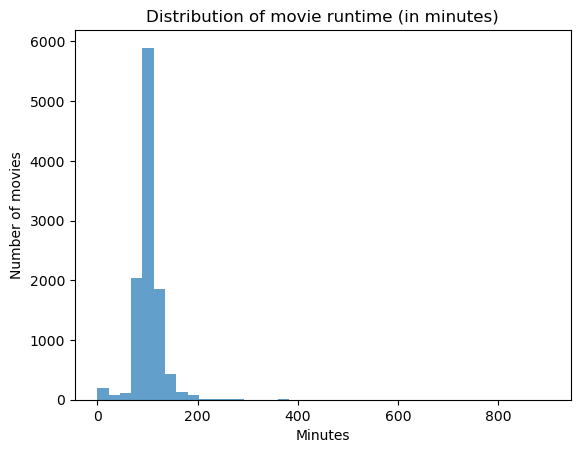

In [112]:
# looking at distribution of runtime:

df['runtime'].plot(kind='hist', bins= 40, alpha=0.7)
plt.title('Distribution of movie runtime (in minutes)')
plt.xlabel('Minutes', fontsize=10)
plt.ylabel('Number of movies', fontsize=10);


The 'runtime' column is of integer type and describes the duration of the movie in minutes. It could be made as time type or kept as integer. I will keep it as integer.

There are no missing values. Statistics shows that values range between 0 and 900 minutes, with a mean of approximately 102 minutes and most of them between 90 and 111 (25% and 75% quantiles respectively).

As seen above, there are 31 rows showing a runtime equal to 0 minutes, which must be errors. The associated rows could be dropped or the zeros could be substitued with correct values (looking for other sources of information) or for a more rapid and approximated approach could be substitued with the most common value or mean. Interestingly, all the rows with zero runtime have all zero adjusted revenue and 28 out of 31 also zero adjusted budget.

Looking at the movie associated with runtime of 900 ('The Story of Film: An Odyssey'), internet sources such as wikipedia, confirms a duration of approximately that length for this documentary. This is therefore not an error.

##### 14 - Column 'genres'

In [113]:
# example sample

df['genres'][0]

'Action|Adventure|Science Fiction|Thriller'

In [114]:
# info() showed this column as object. Check that is string:

type(df['genres'][0])

str

In [115]:
# from .info() we know that there are some missing values on this column. Check

df['genres'].isnull().sum()

23

In [116]:
# looking into rows with nulls

df[df['genres'].isnull()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
424,363869,tt4835298,0.244648,0,0,Belli di papÃ,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,NaN,Guido Chiesa,NaN,NaN,"Italian remake of the Mexican 2013 hit, ""We th...",100,NaN,NaN,10/29/15,21,6.1,2015,0.00000,0.0
620,361043,tt5022680,0.129696,0,0,All Hallows' Eve 2,NaN,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,NaN,NaN,A woman finds a VHS tape on her doorstep that ...,90,NaN,Ruthless Pictures|Hollywood Shorts,10/6/15,13,5.0,2015,0.00000,0.0
997,287663,NaN,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,NaN,Steward Lee|Steven G. Lee,NaN,NaN,"A Long Time Ago In A Galaxy Far, Far Awayâ€¦ A...",44,NaN,NaN,10/3/14,13,6.8,2014,0.00000,0.0
1712,21634,tt1073510,0.302095,0,0,Prayers for Bobby,Ryan Kelley|Sigourney Weaver|Henry Czerny|Dan ...,http://www.prayersforbobby.com/,Russell Mulcahy,"Before you echo ""amen"" in your home and place ...",NaN,"True story of Mary Griffith, gay rights crusad...",88,NaN,Daniel Sladek Entertainment,2/27/09,57,7.4,2009,0.00000,0.0
1897,40534,tt1229827,0.020701,0,0,Jonas Brothers: The Concert Experience,Nick Jonas|Joe Jonas|Kevin Jonas|John Lloyd Ta...,NaN,Bruce Hendricks,NaN,duringcreditsstinger,Secure your VIP pass to a once-in-a-lifetime e...,76,NaN,NaN,2/27/09,11,7.0,2009,0.00000,0.0
2370,127717,tt1525359,0.081892,0,0,Freshman Father,Britt Irvin|Merrilyn Gann|Barbara Tyson|Anthon...,NaN,Michael Scott,NaN,NaN,NaN,0,NaN,NaN,6/5/10,12,5.8,2010,0.00000,0.0
2376,315620,tt1672218,0.068411,0,0,Doctor Who: A Christmas Carol,Matt Smith|Karen Gillan|Arthur Darvill|Michael...,NaN,NaN,NaN,NaN,Amy Pond and Rory Williams are trapped on a cr...,62,NaN,NaN,12/25/10,11,7.7,2010,0.00000,0.0
2853,57892,tt0270053,0.130018,0,0,Vizontele,YÄ±lmaz ErdoÄŸan|Demet Akbag|Altan Erkekli|Cem...,NaN,YÄ±lmaz ErdoÄŸan,NaN,NaN,The story takes place in a small town (called ...,110,NaN,NaN,2/2/01,12,7.2,2001,0.00000,0.0
3279,54330,tt1720044,0.145331,0,0,ì•„ê¸°ì™€ ë‚˜,Jang Keun-suk|Song Ha-yoon|Kim Jeong-Nan,NaN,Kim Jin-Yeong,NaN,NaN,Joon-soo (Jang Geun -Seok) is a rebellious hig...,96,NaN,NaN,8/13/08,11,6.1,2008,0.00000,0.0
4547,123024,tt2305700,0.520520,0,0,London 2012 Olympic Opening Ceremony: Isles of...,Queen Elizabeth II|Mike Oldfield|Kenneth Brana...,http://www.london2012.com/,Danny Boyle,Inspire a generation.,NaN,The London 2012 Olympic Games Opening Ceremony...,220,NaN,BBC,7/27/12,12,8.3,2012,0.00000,0.0


In [117]:
# there are 23 rows with null values. by a first inspection of these rows in the output above,
# it seems that the adjusted revenue is 0 for those movies. Check:

df[df['genres'].isnull()]['revenue_adj']

424      0.0
620      0.0
997      0.0
1712     0.0
1897     0.0
2370     0.0
2376     0.0
2853     0.0
3279     0.0
4547     0.0
4732     0.0
4797     0.0
4890     0.0
5830     0.0
5934     0.0
6043     0.0
6530     0.0
8234     0.0
8614     0.0
8878     0.0
9307     0.0
9799     0.0
10659    0.0
Name: revenue_adj, dtype: float64

In [118]:
# and budget_adj is also null apart from one of the movies

df[df['genres'].isnull()]['budget_adj']

424          0.00000
620          0.00000
997          0.00000
1712         0.00000
1897         0.00000
2370         0.00000
2376         0.00000
2853         0.00000
3279         0.00000
4547         0.00000
4732         0.00000
4797         0.00000
4890         0.00000
5830         0.00000
5934         0.00000
6043         0.00000
6530         0.00000
8234         0.00000
8614         0.00000
8878         0.00000
9307         0.00000
9799         0.00000
10659    28081.84172
Name: budget_adj, dtype: float64

In [119]:
# check number of unique strings

df['genres'].nunique()

2039

In [120]:
# 20 most common values

df['genres'].value_counts().head(20)

Comedy                  712
Drama                   712
Documentary             312
Drama|Romance           289
Comedy|Drama            280
Comedy|Romance          268
Horror|Thriller         259
Horror                  253
Comedy|Drama|Romance    222
Drama|Thriller          138
Comedy|Family           102
Action|Thriller         101
Thriller                 93
Drama|Comedy             92
Animation|Family         90
Crime|Drama|Thriller     81
Crime|Drama              74
Comedy|Horror            72
Drama|Comedy|Romance     64
Action                   63
Name: genres, dtype: int64

The column 'genres' contains strings with one or more genres. If more genres are present, they are separated by character pipe ('|').

There are 23 rows with missing values (which have 'revenue_adj' equal to zero and also 'budject_adj' equal to zero apart for one sample). This information could be searched for in other sources (such as internet), but that is beyond the scope of this project. Missing values will be handled in the EDA section according to analysis question.

To look at genre distibution and to answer questions about the connection between genres and other columns (such as popularity, votes, budget and revenue), it will be necessary to split cells by '|'.

At the moment, the list of most common genres, obtained by .value_counts() on the original dataset, shows 'Comedy' and 'Drama' as the most common. However, such counts are not reliable at the moment as same category can appear also in other and different strings combined with other categories.

##### 15 - Column 'production_companies'

In [121]:
# example sample

df['production_companies'][0]

'Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu'

In [122]:
# .info() showed object type. Check that is string:

type(df['production_companies'][0])

str

In [123]:
# info() showed that there are many missing values. Check:

df['production_companies'].isnull().sum()

1030

In [124]:
df['production_companies'].nunique()

7445

In [125]:
# 20 most common values

df['production_companies'].value_counts().head(20)

Paramount Pictures                        156
Universal Pictures                        133
Warner Bros.                               84
Walt Disney Pictures                       76
Columbia Pictures                          72
Metro-Goldwyn-Mayer (MGM)                  72
New Line Cinema                            61
Touchstone Pictures                        51
20th Century Fox                           50
Twentieth Century Fox Film Corporation     49
TriStar Pictures                           45
Orion Pictures                             42
Miramax Films                              32
Columbia Pictures Corporation              31
DreamWorks Animation                       31
Pixar Animation Studios                    30
Walt Disney Productions                    29
Dimension Films                            28
United Artists                             23
Marvel Studios                             22
Name: production_companies, dtype: int64

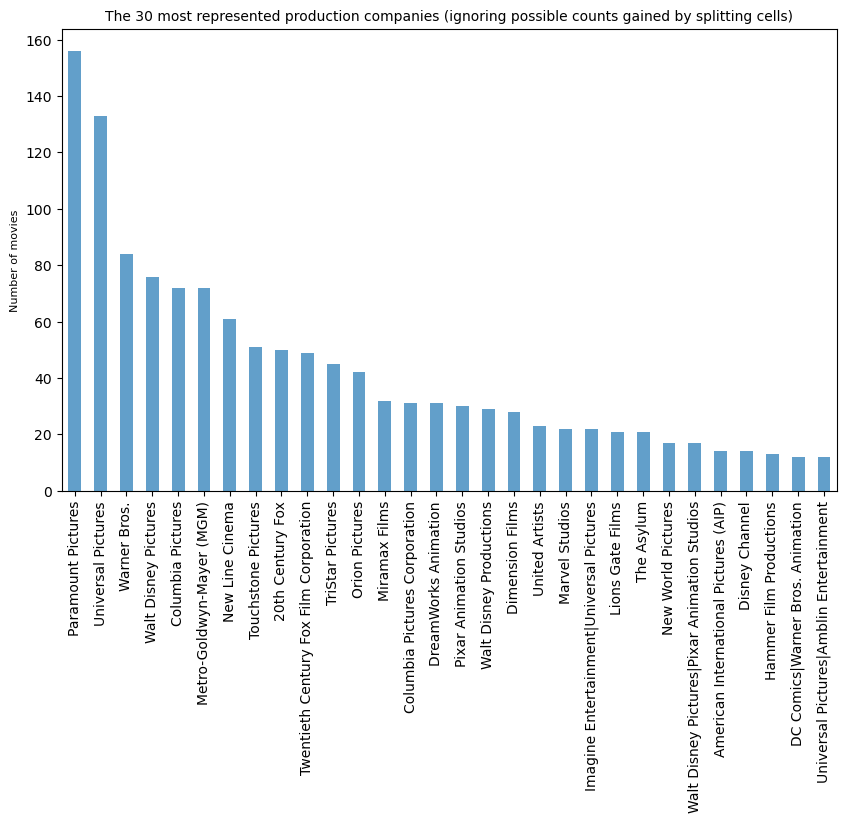

In [126]:
# looking at approximate distribution of production_companies,
# ignoring for now that they can appear as different values when combined with other companies

df['production_companies'].value_counts().head(30).plot(kind='bar', alpha=0.7, figsize=(10,6))
plt.title('The 30 most represented production companies (ignoring possible counts gained by splitting cells)', fontsize=10)
plt.ylabel('Number of movies', fontsize=8);


The column 'production_companies' contains a string with company name/s. If more than a company is present, their names are separated by pipe '|'. There are more than 7000 different unique strings.

There is a significant number of missing values (1030 or 9.5% of data). These values could be sourced elsewhere (beyond the scope of this project). Using fill methods based on most common would be wrong and impact negatively the analysis.

Ignoring for now additional counts derived by splitting of the columns on '|', the most represented companies are: Paramount Pictures and Universal Pictures, followed by Warner Bros and Walt Disney Pictures.

However, a more correct analysis of this column would require splitting on '|' so that the same companies can be correctly identified and statistically evaluated. 

##### 16 - Column 'release_date' and column 'release_year'

In [127]:
# example sample

df['release_date'][0]

'6/9/15'

In [128]:
# from .info() we know that this shows as object. Check that is a string

type(df['release_date'][0])

str

In [129]:
# check format of release_date: dd/mm/yy or mm/dd/yy?

df['release_date'].value_counts()

1/1/09      28
1/1/08      21
1/1/07      18
1/1/05      16
10/10/14    15
            ..
4/22/13      1
7/31/13      1
4/27/13      1
4/13/13      1
11/15/66     1
Name: release_date, Length: 5909, dtype: int64

In [130]:
# from initial investigation and info(), we know this column has no missing values
# the same is true for another column, 'release_year'

df['release_year'][0]

2015

In [131]:
type(df['release_year'][0])

numpy.int64

There is a column called 'release_date' which has been read as object/string type. It appears in the format mm/dd/yy. This column should be datetime type.
There are no missing values.

There is also a column called 'release_year' in integer format, with no missing values.

As the information on year is already available, the 'release_date' column could be converted to datetime to extact other information, such as the release month.

In [132]:
# looking more at release_year column:

df['release_year'].describe()

count    10866.000000
mean      2001.322658
std         12.812941
min       1960.000000
25%       1995.000000
50%       2006.000000
75%       2011.000000
max       2015.000000
Name: release_year, dtype: float64

In [133]:
# looking at number of movies released each year:

df.groupby('release_year').count()['id']

release_year
1960     32
1961     31
1962     32
1963     34
1964     42
1965     35
1966     46
1967     40
1968     39
1969     31
1970     41
1971     55
1972     40
1973     55
1974     47
1975     44
1976     47
1977     57
1978     65
1979     57
1980     78
1981     82
1982     81
1983     80
1984    105
1985    109
1986    121
1987    125
1988    145
1989    137
1990    132
1991    133
1992    133
1993    178
1994    184
1995    175
1996    204
1997    192
1998    210
1999    224
2000    227
2001    242
2002    266
2003    281
2004    307
2005    364
2006    408
2007    438
2008    496
2009    533
2010    490
2011    540
2012    588
2013    659
2014    700
2015    629
Name: id, dtype: int64

In [134]:
df_temp = df.groupby('release_year').count()['id']

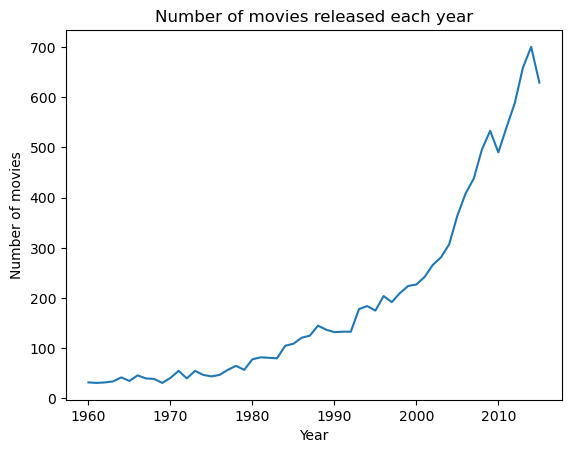

In [135]:
# looking at release year distribution

plt.plot(df_temp.index, df_temp)
plt.title('Number of movies released each year', fontsize=12)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Number of movies', fontsize=10);

From summary statistics, the 'release_year' ranges from 1960 to 2015. The plot shows that the distribution is skewed to the left and the number of released movies in the dataset increased over the years. The maximum number of movies (700) was released in 2014.

##### 17 - Column 'vote_count'

In [136]:
# example sample

df['vote_count'][0]

5562

In [137]:
# .info() showed int64 type and no missing values

In [138]:
# number of unique values

df['vote_count'].nunique()

1289

In [139]:
# summary statistics

df['vote_count'].describe()

count    10866.000000
mean       217.389748
std        575.619058
min         10.000000
25%         17.000000
50%         38.000000
75%        145.750000
max       9767.000000
Name: vote_count, dtype: float64

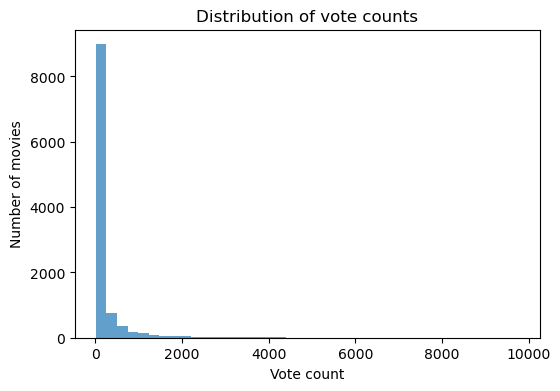

In [140]:
# looking at distribution:

df['vote_count'].plot(kind='hist', bins=40, alpha=0.7, figsize=(6,4))
plt.title('Distribution of vote counts')
plt.xlabel('Vote count', fontsize=10)
plt.ylabel('Number of movies', fontsize=10);

In [141]:
df['vote_count'].median()

38.0

In [142]:
# movie with max number of vote counts

df[df['vote_count'] == (df['vote_count'].max())]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1919,27205,tt1375666,9.363643,160000000,825500000,Inception,Leonardo DiCaprio|Joseph Gordon-Levitt|Ellen P...,http://inceptionmovie.warnerbros.com/,Christopher Nolan,Your mind is the scene of the crime.,loss of lover|dream|sleep|subconsciousness|heist,"Cobb, a skilled thief who commits corporate es...",148,Action|Thriller|Science Fiction|Mystery|Adventure,Legendary Pictures|Warner Bros.|Syncopy,7/14/10,9767,7.9,2010,160000000.0,825500000.0


In [143]:
# movie with min number of vote counts

df[df['vote_count'] == (df['vote_count'].min())]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
240,363689,tt4229298,0.532700,0,0,The Unspoken,Jodelle Ferland|Sunny Suljic|Neal McDonough|Ma...,NaN,Sheldon Wilson,NaN,NaN,In 1997 the close-knit Anderson family vanishe...,90,Thriller|Horror,Lighthouse Pictures|Sapphire Fire Limited,10/24/15,10,4.1,2015,0.000000e+00,0.000000e+00
259,360603,tt5133572,0.476341,0,0,Crown for Christmas,Danica McKellar|Rupert Penry-Jones|Ellie Botte...,NaN,Alex Zamm,NaN,NaN,After getting fired from her job as a maid at ...,84,TV Movie,NaN,11/27/15,10,7.6,2015,0.000000e+00,0.000000e+00
298,354220,tt3826866,0.370258,0,0,The Girl in the Photographs,Kal Penn|Claudia Lee|Kenny Wormald|Toby Heming...,NaN,Nick Simon,NaN,serial killer|tied feet|tied up while barefoot,Images coming from the crimes committed by a d...,95,Crime|Horror|Thriller,NaN,9/14/15,10,4.7,2015,0.000000e+00,0.000000e+00
345,361263,tt4505830,0.342530,0,0,Jesse Stone: Lost in Paradise,Tom Selleck|William Devane|Gloria Reuben|Luke ...,http://www.hallmarkchannel.com/jesse-stone-los...,Robert Harmon,NaN,NaN,"Once a Los Angeles homicide detective, Police ...",87,Drama|TV Movie|Crime|Mystery,Sony Pictures Television,10/18/15,10,5.6,2015,0.000000e+00,0.000000e+00
386,316885,tt4180576,0.291244,0,0,Bridgend,Hannah Murray|Steven Waddington|Adrian Rawlins...,NaN,Jeppe RÃ¸nde,NaN,suicide|adolescence|based on true story|magic ...,"Over a 5-year period in Bridgend in Wales, 79 ...",95,Drama,Blenkov & SchÃ¸nnemann Pictures|Four Sons Pict...,1/22/15,10,5.7,2015,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10802,54000,tt0077539,0.227338,6727000,0,Fedora,William Holden|Marthe Keller|Hildegard Knef|Jo...,NaN,Billy Wilder,Youth had been a habit of hers for so long tha...,hollywood|actor|down on his luck,An ambitious Hollywood hustler becomes involve...,114,Drama|Romance,SociÃ©tÃ© FranÃ§aise de Production (SFP),5/30/78,10,4.9,1978,2.248635e+07,0.000000e+00
10808,40060,tt0077904,0.129123,0,0,The Manitou,Tony Curtis|Michael Ansara|Susan Strasberg|Ste...,NaN,William Girdler,Evil does not dieâ€¦ It waits to be re-born!,female nudity|based on novel|nudity|tarot card...,A psychic's girlfriend finds out that a lump o...,104,Horror,Melvin Simon Productions|Mid-America Pictures|...,4/28/78,10,5.8,1978,0.000000e+00,0.000000e+00
10809,31428,tt0078295,0.128231,0,0,Someone's Watching Me!,Lauren Hutton|David Birney|Adrienne Barbeau|Le...,NaN,John Carpenter,NaN,stalker|suspense|stalking|made for television,A woman is being watched in her apartment by a...,97,Horror|Mystery|TV Movie|Thriller,Warner Bros. Television,11/27/78,10,5.7,1978,0.000000e+00,0.000000e+00
10812,31948,tt0077629,0.318883,0,5438927,Gray Lady Down,Charlton Heston|David Carradine|Stacy Keach|Ne...,NaN,David Greene,Trapped underwater... with time running out.,submarine|drowning|based on novel|rescue|disaster,"The USS Neptune, a nuclear submarine, is sunk ...",111,Thriller|Adventure|History|Drama,Universal Pictures|The Mirisch Corporation,3/10/78,10,6.1,1978,0.000000e+00,1.818071e+07


The column 'vote_count' contains integer numbers and there are no missing values. Values range between 10 and 9767, with a median of 38. There are 501 samples with the minimum 10 vote counts, while there is only one movie with the maximum counts: 'Inception' by Christopher Nolan.

The distribution of vote counts is clearly skewed to the right as most values are on the lower range (quantile values: 25%=17, 50%=38, 75%=145.75).

This column does not need any evident data cleaning.

##### 18 - Column 'vote_average'

In [144]:
# example sample

df['vote_average'][0]

6.5

In [145]:
# .info() showed float64 type and no missing values

In [146]:
# number of unique values

df['vote_average'].nunique()

72

In [147]:
# summary statistics

df['vote_average'].describe()

count    10866.000000
mean         5.974922
std          0.935142
min          1.500000
25%          5.400000
50%          6.000000
75%          6.600000
max          9.200000
Name: vote_average, dtype: float64

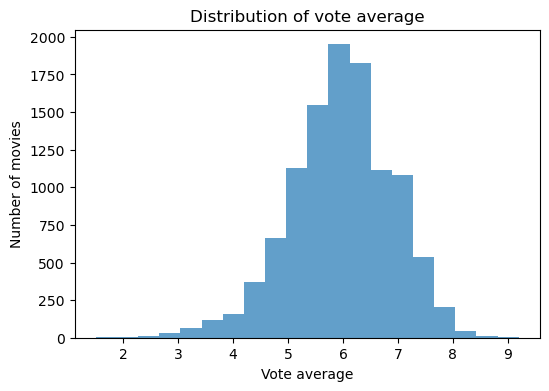

In [148]:
# looking at vote average distribution:

df['vote_average'].plot(kind='hist', bins=20, alpha=0.7, figsize=(6,4))
plt.title('Distribution of vote average')
plt.xlabel('Vote average', fontsize=10)
plt.ylabel('Number of movies', fontsize=10);

In [149]:
# movie with max vote

df[df['vote_average'] == (df['vote_average'].max())]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3894,125336,tt2044056,0.006925,0,0,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,http://www.channel4.com/programmes/the-story-o...,Mark Cousins,NaN,cinema|nouvelle vague|hindi cinema|cinema novo...,"The Story of Film: An Odyssey, written and dir...",900,Documentary,NaN,9/3/11,14,9.2,2011,0.0,0.0


In [150]:
# movie with min vote

df[df['vote_average'] == (df['vote_average'].min())]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
7772,25055,tt0960835,0.121120,0,0,Transmorphers,Matthew Wolf|Amy Weber|Shaley Scott|Eliza Swen...,NaN,Leigh Scott,NaN,futuristic,About a race of alien robots that have conquer...,86,Action|Adventure|Science Fiction,"Asylum, The",6/26/07,10,1.5,2007,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,fire|gun|drive|sacrifice|flashlight,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


The 'vote_average' column is numerical (float64) and has no missing values. Values range between 1.5 and 9.2 with a mean of 5.97.

There seems to be a normal distribution.

The movie with the highest average vote is the documentary 'The Story of Film: An Odyssey' by Mark Cousins (for which unfortunately there are no information for budget or revenue). The movies with the lowest votes are: 'Transmorphers' by Leigh Scott and 'Manos: The Hands of Fate' by Harold P. Warren.

I will keep this column as it is (no evident need of data cleaning).


### Data Cleaning

Following the investigations on the different columns of the provided dataset carried out above, in this section I will:

- drop the duplicate row;
- change datatype of column 'release_date'(string 'mm/dd/yy'): parse it to datetime;
- change 'original_title' column so that all characters in the strings are lower case;
- drop columns: 'imdb_id', 'budget', 'revenue', 'homepage', 'tagline', 'keywords', 'overview';
- export dataframe to csv to keep it as reference (before modifications specific to research question).

Additional notes to keep in mind for the analysis of the remaining columns in the dataframe and which will be handled according to analysis question (on copies of reference dataframe):
- 'id' column is just a unique movie identifier;
- 'budget_adj' and 'revenue_adj' have many zero values (considered errors);
- column 'runtime' has zeros in 33 rows (probable errors) and these rows are also associated with zeros in 'revenue_adj';
- there are missing values for: 'cast' (76, of which 71 with 0 revenue_adj), 'director' (44, of which 43 with 0 revenue_ adj), genres (23, but all with 0 revenue_adj), production_companies (many missing: 1030);
- columns 'cast', 'director', 'genres', 'production_companies': are strings which can contain pipes as separators of different categories in the same cell.

In [151]:
# original dataset shape

df.shape

(10866, 21)

In [152]:
# drop the duplicate row

df.drop_duplicates(inplace=True)

In [153]:
# re-check for duplicates

df.duplicated().sum()

0

In [154]:
# new shape

df.shape

(10865, 21)

As previously seen, the original dataframe has one __duplicate row__. This has been __dropped__ and now there are 10865 samples or movies (and still 21 columns).

In [155]:
# parse string column 'release_date' (string 'mm/dd/yy') to datetime

df['release_date'] = pd.to_datetime(df['release_date'])

In [156]:
# check type

df.dtypes

id                               int64
imdb_id                         object
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

The column __'release_date'__ was of object type (string). It has been __parsed to datetime__. There is already a column with the release year in the dataframe. We could eventually use this date column to extract other information, such as month.

In [157]:
# change 'original_title' so that all characters in the string are lower case

df['original_title'] = df['original_title'].str.lower()

In [158]:
df['original_title'].value_counts().head(10)

hamlet               4
julia                3
carrie               3
oliver twist         3
wuthering heights    3
hercules             3
shelter              3
the black hole       3
jane eyre            3
emma                 3
Name: original_title, dtype: int64

The column __'original_title'__ contained some upper characters that could cause some title names to appear different. Here the strings have been made __all lower case__ for consistancy.

In [159]:
# drop columns not used for any analysis in this project:
# 'imdb_id', 'budget', 'revenue', 'homepage', 'tagline', 'keywords', 'overview'.

cols_to_drop = ['imdb_id', 'budget', 'revenue', 'homepage', 'tagline', 'keywords', 'overview']

df.drop(columns=cols_to_drop, inplace=True)

In [160]:
# re-check shape

df.shape

(10865, 14)

In [161]:
# re-check dataframe summary

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10865 non-null  int64         
 1   popularity            10865 non-null  float64       
 2   original_title        10865 non-null  object        
 3   cast                  10789 non-null  object        
 4   director              10821 non-null  object        
 5   runtime               10865 non-null  int64         
 6   genres                10842 non-null  object        
 7   production_companies  9835 non-null   object        
 8   release_date          10865 non-null  datetime64[ns]
 9   vote_count            10865 non-null  int64         
 10  vote_average          10865 non-null  float64       
 11  release_year          10865 non-null  int64         
 12  budget_adj            10865 non-null  float64       
 13  revenue_adj     

In [162]:
# export to csv for reference, before further modifications according to research question.

df.to_csv('df_movies_v1.csv', index=False)

The following __columns have been dropped__:
- 'imdb_id' (other unique movie idenitifier with 10 missing values) 
- 'budget' (there is another column of adjusted budget, more useful for analysis)
- 'revenue' (there is another column of adjusted revenue, more useful for analysis)
- 'homepage' (many missing values and not useful for analysis)
- 'tagline' (many missing values and useful only for some more advanced text analysis)
- 'keywords' (many missing values and useful only for some more advanced text analysis)
- 'overview' (unique description of the movie)

__The dataframe has now 10865 samples or movies and 14 columns. Some columns have missing values and, as previously seen, some zeros considered errors. The missing and zero values will be handled according to analysis question in the following sections.__

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1:  What kind of properties are associated with movies that have high revenues?

In this section the focus will be on identifying the movies with the highest revenue and analyising the relationship between revenue and other features such as budget, popularity, votes and runtimes.

In [163]:
# make a copy of the dataframe to modify for this research question 1

df_rev = df.copy()

I  __drop the column release_date__ as not used for this analysis and there is already a 'release_year' column.

In [164]:
df_rev.drop('release_date', axis=1, inplace=True)

In [165]:
# check dataframe shape

df_rev.shape

(10865, 13)

In [166]:
df_rev.head(3)

,id,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,jurassic world,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,mad max: fury road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08


In [167]:
# check summary information

df_rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   popularity            10865 non-null  float64
 2   original_title        10865 non-null  object 
 3   cast                  10789 non-null  object 
 4   director              10821 non-null  object 
 5   runtime               10865 non-null  int64  
 6   genres                10842 non-null  object 
 7   production_companies  9835 non-null   object 
 8   vote_count            10865 non-null  int64  
 9   vote_average          10865 non-null  float64
 10  release_year          10865 non-null  int64  
 11  budget_adj            10865 non-null  float64
 12  revenue_adj           10865 non-null  float64
dtypes: float64(4), int64(4), object(5)
memory usage: 1.2+ MB


At this point the dataframe df_rev has 10865 samples or movies and 13 columns.

For question 1, it is fundamental to __address the zeros previously identified in the 'revenue_adj' and 'budget_adj' columns and considered errors__.

In [168]:
# I know from previous analysis that there are many movies with zero revenue_adj

df_rev[df_rev['revenue_adj'] == 0].count()['id']

6016

In [169]:
# I know from previous analysis that there are many movies with zero budget_adj

df_rev[df_rev['budget_adj'] == 0].count()['id']

5696

Previous analysis showed that there are many movies with zero 'revenue_adj' and/or with zero 'budget_adj', which are considered errors. Looking to correct the zeros from other sources of information is beyond the scope of this project. Using mean/median to replace all these zeros would affect significantly the results introducing more errors in the analysis.

Here, I decide to __drop all the rows which have zero in 'revenue_adj' or 'budget_adj'__.

In [170]:
# keep only movies which have both 'revenue_adj' and 'budget_adj' different than zero

df_rev = df_rev[(df_rev['revenue_adj'] != 0) & (df_rev['budget_adj'] != 0)]

In [171]:
# check new dataframe shape

df_rev.shape

(3854, 13)

In [172]:
# double check that i have no revenue_adj = 0

df_rev[df_rev['revenue_adj'] == 0].count()['id']

0

In [173]:
# double check that i have no budget_adj = 0

df_rev[df_rev['budget_adj'] == 0].count()['id']

0

Now the dataframe contains only __3854 samples/movies and 13 columns__.

I need to check missing values for the columns of the updated dataframe, after all these rows have been dropped.

In [174]:
df_rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3854 non-null   int64  
 1   popularity            3854 non-null   float64
 2   original_title        3854 non-null   object 
 3   cast                  3850 non-null   object 
 4   director              3853 non-null   object 
 5   runtime               3854 non-null   int64  
 6   genres                3854 non-null   object 
 7   production_companies  3808 non-null   object 
 8   vote_count            3854 non-null   int64  
 9   vote_average          3854 non-null   float64
 10  release_year          3854 non-null   int64  
 11  budget_adj            3854 non-null   float64
 12  revenue_adj           3854 non-null   float64
dtypes: float64(4), int64(4), object(5)
memory usage: 421.5+ KB


In [175]:
df_rev.isnull().sum()

id                       0
popularity               0
original_title           0
cast                     4
director                 1
runtime                  0
genres                   0
production_companies    46
vote_count               0
vote_average             0
release_year             0
budget_adj               0
revenue_adj              0
dtype: int64

__There are some missing values in the string columns: 'cast' (4), 'director' (1), 'production_companies' (46)__. These are non-numeric columns which are not at the centre of question 1 analysis. However, I will keep these columns as they may provide interesting additional information and descriptions of selected movies.

Sourcing these information elsewhere is beyond the scope of the project. Here __I will substitute these Nulls with a string saying 'missing information'__.

In [176]:
# filling the missing values with string 'missing value'

df_rev.fillna('missing information', inplace=True)

In [177]:
# check now that there are no missing values.

df_rev.isnull().sum()

id                      0
popularity              0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

#### Checking statistics and distribution of numerical variables and revenue_adj for this modified dataframe

In [178]:
# look at summary of descriptive statistics for the numerical columns of interest

df_rev.drop('id', axis=1).describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3854.000000,3854.000000,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03
mean,1.191554,109.220291,527.720291,6.168163,2001.261028,4.423999e+07,1.370647e+08
std,1.475162,19.922820,879.956821,0.794920,11.282575,4.480925e+07,2.161114e+08
min,0.001117,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,0.462367,95.000000,71.000000,5.700000,1995.000000,1.309053e+07,1.835735e+07
50%,0.797511,106.000000,204.000000,6.200000,2004.000000,3.001611e+07,6.173068e+07
75%,1.368324,119.000000,580.000000,6.700000,2010.000000,6.061307e+07,1.632577e+08
max,32.985763,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


A summary of descriptive statistics shows that for this updated dataset:
- 'popularity' ranges between just above 0 and almost 33. However most of the values are below 1
- 'runtime' ranges between 15 and 338 minutes, with a mean of approximately 109
- 'vote_count' ranges between 10 and a maximum of 9767, but most of values are well below the maximumn (quantiles 25%, 50% and 75% are 71, 204 and 580 respectively)
- 'vote_average' ranges between 2.2 and 8.4, with a mean of approximately 6.17
- 'release_year' ranges between 1960 amd 2015
- 'budget_adj' ranges approximately between 0.97 and 425000000 USD
- 'revenue_adj' ranges approximately between 2.37 and 2827124000 USD

I will plot histograms of each of these variables to have a better understanding of their distributions for the updated dataframe.

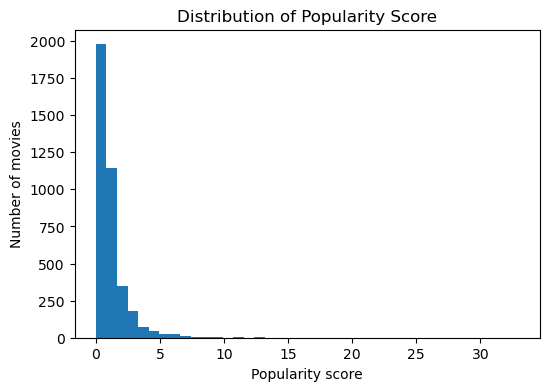

In [179]:
# distribution of Popularity

df_rev['popularity'].plot(kind='hist', bins=40, figsize=(6,4))
plt.title('Distribution of Popularity Score')
plt.xlabel('Popularity score', fontsize=10)
plt.ylabel('Number of movies', fontsize=10);

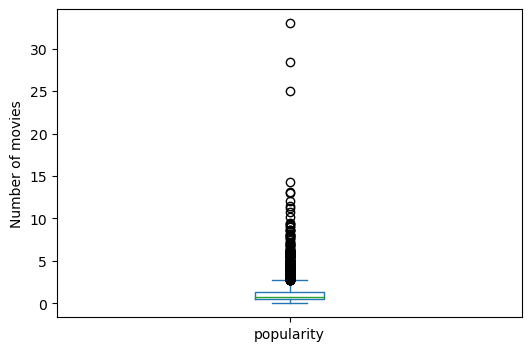

In [180]:
df_rev['popularity'].plot(kind='box', figsize=(6,4))
plt.ylabel('Number of movies', fontsize=10);

In [181]:
df_rev['popularity'].median()

0.7975105

In [182]:
# checking movies with values above 20
df_rev[df_rev['popularity'] > 20]

,id,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,jurassic world,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,mad max: fury road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
629,157336,24.949134,interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,169,Adventure|Drama|Science Fiction,Paramount Pictures|Legendary Pictures|Warner B...,6498,8.0,2014,1.519800e+08,5.726906e+08


The histogram of popularity is highly skewed to the right. As previously observed from descriptive statistics, most of the values are below 1 (median value of 0.798). There are only three movies with popularity above 20 ('jurassic world', 'mad max: fury road' and 'interstellar').

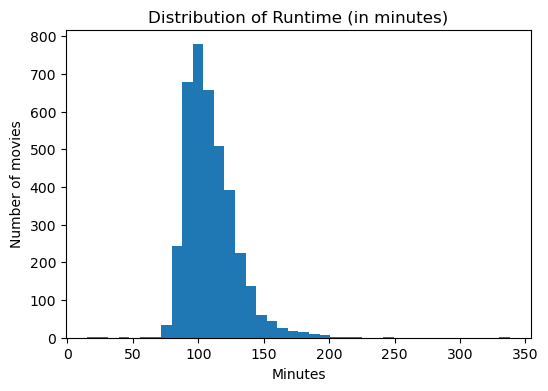

In [183]:
# distribution of Runtime

df_rev['runtime'].plot(kind='hist', bins=40, figsize=(6,4))
plt.title('Distribution of Runtime (in minutes)')
plt.xlabel('Minutes', fontsize=10)
plt.ylabel('Number of movies', fontsize=10);

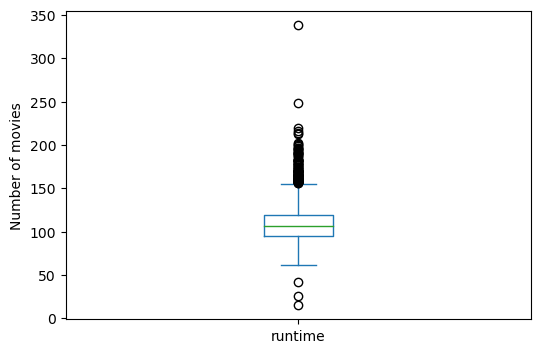

In [184]:
df_rev['runtime'].plot(kind='box', figsize=(6,4))
plt.ylabel('Number of movies', fontsize=10);

In [185]:
# looking at movies with shortest runtime

df_rev[df_rev['runtime'] < 50]

,id,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
3239,14301,0.352054,dr. horrible's sing-along blog,Neil Patrick Harris|Nathan Fillion|Felicia Day...,Joss Whedon,42,Adventure|Action|Comedy|Science Fiction|Music,missing information,140,7.7,2008,2.025573e+05,3.038360e+00
5162,24914,0.208637,kid's story,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...,Shinichiro Watanabe,15,Science Fiction|Animation,Studio 4Â°C,16,6.8,2003,1.185353e+01,5.926763e+00
8005,14813,0.592219,mickey's christmas carol,Alan Young|Wayne Allwine|Clarence Nash|Hal Smi...,Burny Mattinson,26,Family|Animation,Walt Disney Pictures,89,7.4,1983,6.567936e+06,4.597555e+07


In [186]:
# looking at movies with longest runtime

df_rev[df_rev['runtime'] > 200]

,id,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
2107,43434,0.534192,carlos,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Olivier Assayas,338,Crime|Drama|Thriller|History,Egoli Tossell Film AG|Canal+|Arte France|Films...,35,6.2,2010,1.800000e+07,8.712790e+05
3110,14073,0.389554,jodhaa akbar,Hrithik Roshan|Aishwarya Rai Bachchan|Sonu Soo...,Ashutosh Gowariker,213,Action|Adventure|Drama|Foreign|History,UTV Motion Pictures|Ashutosh Gowariker Product...,48,7.8,2008,8.483911e+06,1.316623e+07
4949,122,7.122455,the lord of the rings: the return of the king,Elijah Wood|Ian McKellen|Viggo Mortensen|Liv T...,Peter Jackson,201,Adventure|Fantasy|Action,WingNut Films|New Line Cinema,5636,7.9,2003,1.114231e+08,1.326278e+09
5065,16072,0.469518,gods and generals,Stephen Lang|Jeff Daniels|Robert Duvall|Kevin ...,Ronald F. Maxwell,214,Drama|History|War,Turner Pictures|Antietam Filmworks,23,5.8,2003,6.637975e+07,1.531942e+07
7332,10935,0.418950,heaven's gate,Kris Kristofferson|Christopher Walken|John Hur...,Michael Cimino,219,Action|Drama|History|Western,United Artists,18,6.0,1980,1.164256e+08,9.219668e+06
8282,1883,0.648937,malcolm x,Denzel Washington|Angela Bassett|Albert Hall|A...,Spike Lee,202,Drama|History,JVC Entertainment|Warner Bros.,201,7.0,1992,5.283682e+07,7.485721e+07
9850,947,1.168767,lawrence of arabia,Peter O'Toole|Alec Guinness|Anthony Quinn|Jack...,David Lean,216,Adventure|Drama|History|War,Horizon Pictures (II),517,7.5,1962,1.081267e+08,5.045914e+08
10443,8095,0.804533,cleopatra,Elizabeth Taylor|Richard Burton|Rex Harrison|R...,Joseph L. Mankiewicz|Rouben Mamoulian|Darryl F...,248,Drama|History|Romance,Twentieth Century Fox Film Corporation|MCL Fil...,68,6.3,1963,2.215444e+08,4.111904e+08


Runtime distribution appears normal, with mean of approximately 109 minutes (seen in descriptive statistics). There are  a few movies with low duration (ex three movies below 50 minutes: 'dr. horrible's sing-along blog', 'kid's story', 'mickey's christmas carol') and a few more above 200 minutes. The longest movie is 'carlos' by Olivier Assayas (338 minutes). These more extreme values seem genuine (not errors) by a check search of movie durations on internet.

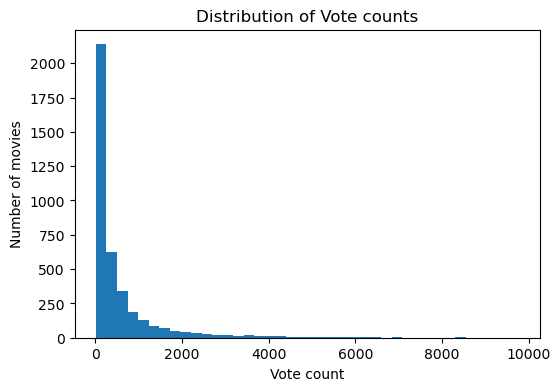

In [187]:
# distribution of vote count

df_rev['vote_count'].plot(kind='hist', bins=40, figsize=(6,4))
plt.title('Distribution of Vote counts')
plt.xlabel('Vote count', fontsize=10)
plt.ylabel('Number of movies', fontsize=10);

In [188]:
df_rev['vote_count'].median()

204.0

The distribution of vote counts is skewed to the right, with a median of 204. There are some movies with very high vote counts.
As seen from the code below, the most votes are given to: 'inception', 'the avengers', 'avatar' and 'the dark knight'.

In [189]:
# movies with the highest vote count

df_rev[df_rev['vote_count'] > 8000].sort_values(by='vote_count', ascending=False)

,id,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
1919,27205,9.363643,inception,Leonardo DiCaprio|Joseph Gordon-Levitt|Ellen P...,Christopher Nolan,148,Action|Thriller|Science Fiction|Mystery|Adventure,Legendary Pictures|Warner Bros.|Syncopy,9767,7.9,2010,1.600000e+08,8.255000e+08
4361,24428,7.637767,the avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,143,Science Fiction|Action|Adventure,Marvel Studios,8903,7.3,2012,2.089437e+08,1.443191e+09
1386,19995,9.432768,avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,8458,7.1,2009,2.408869e+08,2.827124e+09
2875,155,8.466668,the dark knight,Christian Bale|Michael Caine|Heath Ledger|Aaro...,Christopher Nolan,152,Drama|Action|Crime|Thriller,DC Comics|Legendary Pictures|Warner Bros.|Syncopy,8432,8.1,2008,1.873655e+08,1.014733e+09


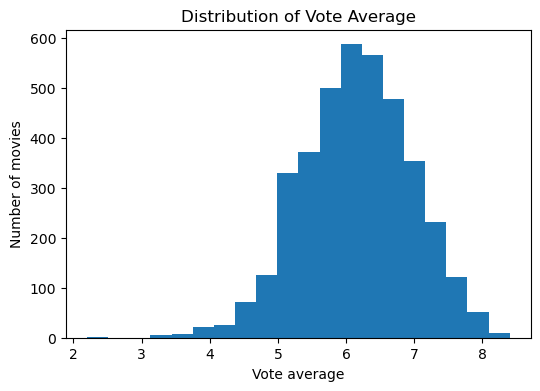

In [190]:
# distribution of vote average

df_rev['vote_average'].plot(kind='hist', bins=20, figsize=(6,4))
plt.title('Distribution of Vote Average')
plt.xlabel('Vote average', fontsize=10)
plt.ylabel('Number of movies', fontsize=10);

In [191]:
# movie with the highest vote average

df_rev[df_rev['vote_average'] == df_rev['vote_average'].max()]

,id,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
4178,278,7.192039,the shawshank redemption,Tim Robbins|Morgan Freeman|Bob Gunton|William ...,Frank Darabont,142,Drama|Crime,Castle Rock Entertainment,5754,8.4,1994,3.677779e+07,4.169346e+07
7948,24128,0.283191,stop making sense,David Byrne|Tina Weymouth|Chris Frantz|Jerry H...,Jonathan Demme,88,Documentary|Music,Talking Heads|Arnold Stiefel Company,23,8.4,1984,2.518850e+06,1.045097e+07


In [192]:
# movie/s with the lowest vote average

df_rev[df_rev['vote_average'] == df_rev['vote_average'].min()]

,id,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
4859,116977,0.111351,foodfight!,Charlie Sheen|Wayne Brady|Hilary Duff|Eva Long...,Lawrence Kasanoff,87,Animation|Action|Comedy|Family,Threshold Entertainment|Lions Gate Family Ente...,12,2.2,2012,6.173338e+07,70001.852001


The vote average has approximately normal distribution, with a mean of 6.17 (as seen in descriptive statistics). The movies with the maximum vote (8.4) are 'the shawshank redemption' by Frank  Darbont and 'stop making sense' by Jonathan Demme.
The movie with the lowest vote (2.2) is foodfight!' by Lawrence Kasanoff.

In [193]:
# movies with the lowest vote average:

df_rev[df_rev['vote_average'] < 3.4].sort_values(by='vote_average', ascending=True)

,id,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
4859,116977,0.111351,foodfight!,Charlie Sheen|Wayne Brady|Hilary Duff|Eva Long...,Lawrence Kasanoff,87,Animation|Action|Comedy|Family,Threshold Entertainment|Lions Gate Family Ente...,12,2.2,2012,6.173338e+07,7.000185e+04
3134,13805,0.812489,disaster movie,Matt Lanter|Vanessa Lachey|Nicole Ari Parker|C...,Jason Friedberg|Aaron Seltzer,87,Action|Comedy,Grosvenor Park Media Ltd.|LionsGate|3 in the Box,130,3.3,2008,2.531967e+07,1.428969e+07
4115,9544,0.231392,feardotcom,Stephen Dorff|Natascha McElhone|Stephen Rea|Ud...,William Malone,101,Horror|Thriller,Milagro Films|Franchise Pictures|DoRo Fiction ...,46,3.3,2002,4.849046e+07,2.291418e+07
4540,135812,0.543869,dracula 3d,Thomas Kretschmann|Asia Argento|Rutger Hauer|M...,Dario Argento,109,Horror|Romance|Thriller,Enrique Cerezo Producciones CinematogrÃ¡ficas ...,22,3.3,2012,5.318568e+06,7.729969e+03


In [194]:
# looking at how many movies there are in the dataset for each year

df_temp = df.groupby('release_year').count()['id']

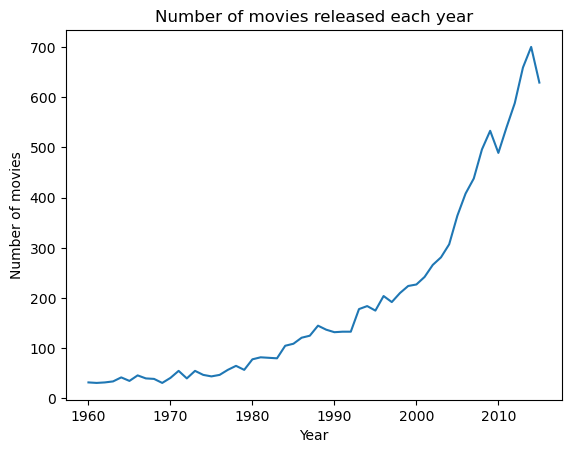

In [195]:
# looking at release year distribution

plt.plot(df_temp.index, df_temp)
plt.title('Number of movies released each year', fontsize=12)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Number of movies', fontsize=10);

As seen in the original data provided, also in this updated dataframe, there is an increase in number of movies with the years, in particular in the years after 2000.

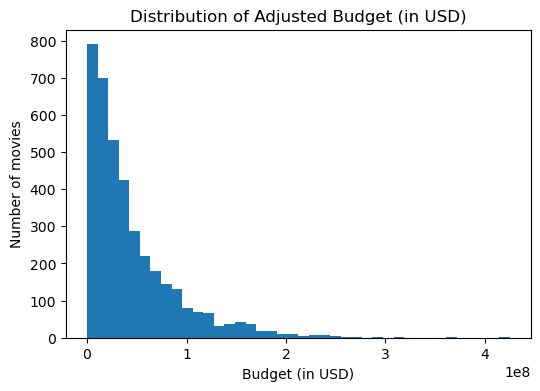

In [196]:
# distribution of adjusted budget

df_rev['budget_adj'].plot(kind='hist', bins=40, figsize=(6,4))
plt.title('Distribution of Adjusted Budget (in USD)')
plt.xlabel('Budget (in USD)', fontsize=10)
plt.ylabel('Number of movies', fontsize=10);

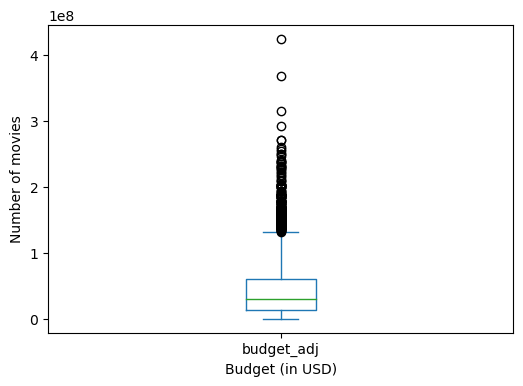

In [197]:
df_rev['budget_adj'].plot(kind='box', figsize=(6,4))
plt.xlabel('Budget (in USD)', fontsize=10)
plt.ylabel('Number of movies', fontsize=10);

In [198]:
df_rev['budget_adj'].median()

30016111.9054567

In [199]:
# movies with lowest budget

df_rev[df_rev['budget_adj'] < 10].sort_values(by='budget_adj', ascending=True)

,id,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
3581,59296,0.520430,"love, wedding, marriage",Mandy Moore|Kellan Lutz|Jessica Szohr|Autumn F...,Dermot Mulroney,90,Comedy|Romance,120dB Films|Scion Films|Voodoo Production Serv...,55,5.3,2011,0.969398,1335.830503
2618,39964,0.090186,lost & found,David Spade|Sophie Marceau|Ever Carradine|Step...,Jeff Pollack,95,Comedy|Romance,Alcon Entertainment|Dinamo Entertainment,14,4.8,1999,1.309053,130.905285
2398,39356,0.028456,boy,James Rolleston|Craig Hall|Taika Waititi|Te Ah...,Taika Waititi,87,Drama|Comedy,New Zealand Film Commission|Unison Films|Whenu...,26,7.3,2010,3.000000,43.000000
8944,14373,0.464188,death wish 2,Charles Bronson|Jill Ireland|Vincent Gardenia|...,Michael Winner,88,Action|Crime|Thriller,Cannon Films,27,5.6,1982,4.519285,36.154278
10050,20701,0.317091,tales from the darkside: the movie,Rae Dawn Chong|Christian Slater|Deborah Harry|...,John Harrison,93,Fantasy|Horror|Comedy,Paramount Pictures|Laurel Productions|Darkside...,37,5.8,1990,5.006696,26.702377
8235,25066,0.105894,tales from the hood,Clarence Williams III|Corbin Bernsen|David Ala...,Rusty Cundieff,98,Horror|Thriller,Savoy Pictures,13,5.1,1995,8.585801,15.740636
5852,217708,0.222776,hross ã­ oss,Ingvar Eggert SigurÃ°sson|Charlotte BÃ¸ving|St...,Benedikt Erlingsson,85,Drama|Romance|Comedy,Filmhuset Gruppen|Leiknar Myndir,11,6.5,2013,9.360334,10.296367


In [200]:
# movies with highest budget


df_rev[df_rev['budget_adj'] == df_rev['budget_adj'].max()]

,id,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
2244,46528,0.25054,the warrior's way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,74,6.4,2010,425000000.0,11087569.0


The distribution of adjusted budget is clearly skewed to the right, with a median of approximately 30016112 USD dollars. There are some movies with very small budget (ex below 10), which would need further investigation to assess if correct (for now I assume they are). The movie with the smallest budget is 'love, wedding, marriage' by Dermot Mulroney. 

The movie with the highest budget in this updated dataframe is now 'the warrior's way' by Sngmoo Lee, with a budget of 425000000 USD. 

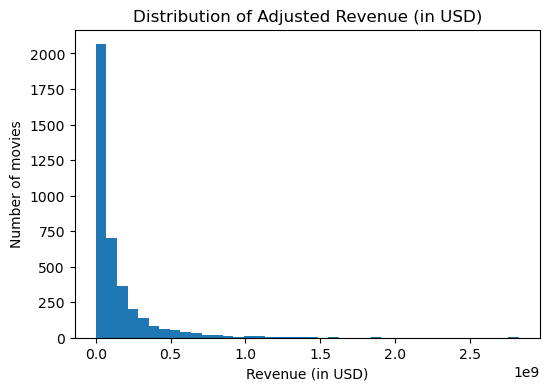

In [201]:
# distribution of adjusted revenue

df_rev['revenue_adj'].plot(kind='hist', bins=40, figsize=(6,4))
plt.title('Distribution of Adjusted Revenue (in USD)')
plt.xlabel('Revenue (in USD)', fontsize=10)
plt.ylabel('Number of movies', fontsize=10);

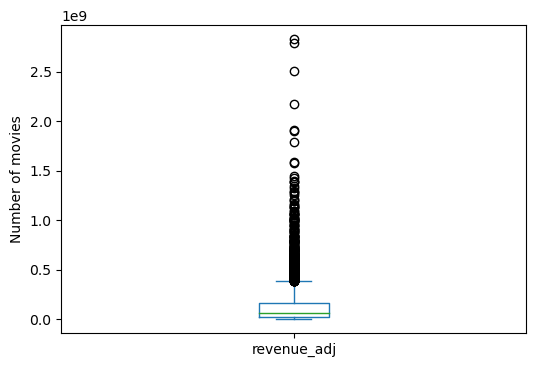

In [202]:
df_rev['revenue_adj'].plot(kind='box', figsize=(6,4))
plt.ylabel('Number of movies', fontsize=10);

In [203]:
df_rev['revenue_adj'].median()

61730679.078951746

In [204]:
# movie with max revenue

df_rev[df_rev['revenue_adj'] == df_rev['revenue_adj'].max()]

,id,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,9.432768,avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,8458,7.1,2009,2.408869e+08,2.827124e+09


In [205]:
# movies with highest revenue

df_rev[df_rev['revenue_adj'] > 1500000000].sort_values(by='revenue_adj', ascending=False)

,id,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,9.432768,avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,8458,7.1,2009,2.408869e+08,2.827124e+09
1329,11,12.037933,star wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,121,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,4428,7.9,1977,3.957559e+07,2.789712e+09
5231,597,4.355219,titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,4654,7.3,1997,2.716921e+08,2.506406e+09
10594,9552,2.010733,the exorcist,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,William Friedkin,122,Drama|Horror|Thriller,Warner Bros.|Hoya Productions,1113,7.2,1973,3.928928e+07,2.167325e+09
9806,578,2.563191,jaws,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,Steven Spielberg,124,Horror|Thriller|Adventure,Universal Pictures|Zanuck/Brown Productions,1415,7.3,1975,2.836275e+07,1.907006e+09
3,140607,11.173104,star wars: the force awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
8889,601,2.900556,e.t. the extra-terrestrial,Henry Thomas|Drew Barrymore|Robert MacNaughton...,Steven Spielberg,115,Science Fiction|Adventure|Family|Fantasy,Universal Pictures|Amblin Entertainment,1830,7.2,1982,2.372625e+07,1.791694e+09
8094,1642,1.136610,the net,Sandra Bullock|Jeremy Northam|Dennis Miller|We...,Irwin Winkler,114,Crime|Drama|Mystery|Thriller|Action,Columbia Pictures,201,5.6,1995,3.148127e+07,1.583050e+09
10110,12230,2.631987,one hundred and one dalmatians,Rod Taylor|J. Pat O'Malley|Betty Lou Gerson|Ma...,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,79,Adventure|Animation|Comedy|Family,Walt Disney Productions,913,6.6,1961,2.917944e+07,1.574815e+09


In [206]:
# movie with lowest revenue

df_rev[df_rev['revenue_adj'] == df_rev['revenue_adj'].min()]

,id,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
5067,13537,0.462609,shattered glass,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...,Billy Ray,94,Drama|History,Lions Gate Films|Cruise/Wagner Productions|Bau...,46,6.4,2003,7.112116e+06,2.370705


In [207]:
# movies with lowest revenue

df_rev[df_rev['revenue_adj'] < 10].sort_values(by='revenue_adj', ascending=True)

,id,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
5067,13537,0.462609,shattered glass,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...,Billy Ray,94,Drama|History,Lions Gate Films|Cruise/Wagner Productions|Bau...,46,6.4,2003,7.112116e+06,2.370705
8142,2293,0.552091,mallrats,Jason Lee|Jeremy London|Shannen Doherty|Claire...,Kevin Smith,94,Romance|Comedy,Gramercy Pictures|Alphaville Films|View Askew ...,201,6.8,1995,8.585801e+06,2.861934
3239,14301,0.352054,dr. horrible's sing-along blog,Neil Patrick Harris|Nathan Fillion|Felicia Day...,Joss Whedon,42,Adventure|Action|Comedy|Science Fiction|Music,missing information,140,7.7,2008,2.025573e+05,3.038360
5162,24914,0.208637,kid's story,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...,Shinichiro Watanabe,15,Science Fiction|Animation,Studio 4Â°C,16,6.8,2003,1.185353e+01,5.926763
8523,9431,0.578849,bordello of blood,Dennis Miller|Erika Eleniak|Angie Everhart|Joh...,Gilbert Adler,87,Horror|Comedy,Tales From The Crypt Holdings|Universal City S...,27,4.9,1996,2.085325e+07,6.951084
8226,48781,0.183034,never talk to strangers,Rebecca De Mornay|Antonio Banderas|Dennis Mill...,Peter Hall,86,Thriller|Romance,TriStar Pictures,15,4.5,1995,9.158188e+06,8.585801
10307,2259,0.450208,the house of the spirits,Meryl Streep|Glenn Close|Jeremy Irons|Winona R...,Bille August,140,Romance|Drama,Det Danske Filminstitut|Spring Creek Productio...,52,6.7,1993,3.773675e+07,9.056820


__The distribution of adjusted revenue is clearly skewed to the right, with a median value of 61730679 USD__.
The movie with highest revenue is 'avatar' by James Cameron, followed by 'start wars', 'titanic' and 'the exorcist'.
The movie with the lowest revenue is 'shattered glass' by Billy Ray and there are a total of 7 movies with a revenue less than 10 USD. This seems very low, also comparing it with the budget of same movies. These low values should be double-checked, for now and the scope of this project, I assume they are correct.

The __graph below shows the 15 movies with the highest revenue and their revenue amounts__.


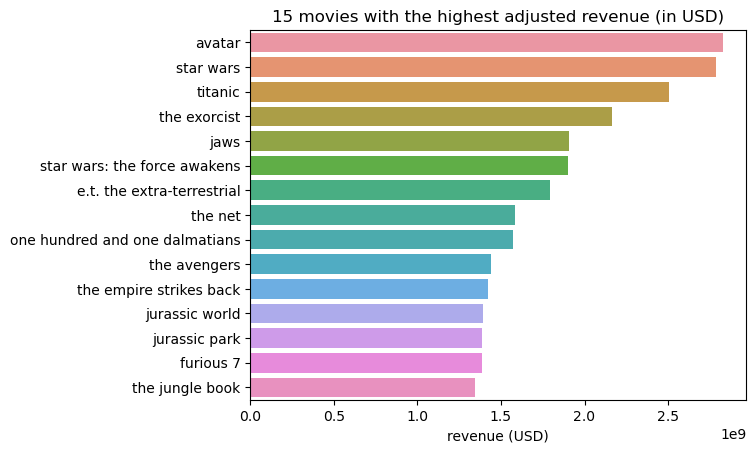

In [208]:
# graph of the top revenue movies

df_rev_top = df_rev.sort_values(by='revenue_adj', ascending=False).head(15)

sns.barplot(x=df_rev_top['revenue_adj'], y=df_rev_top['original_title'], orient='h')
plt.title('15 movies with the highest adjusted revenue (in USD)')
plt.xlabel('revenue (USD)')
plt.ylabel('');

#### Looking at relationships between variables and in particular between variables and revenue

In [209]:
# looking at correlation between the numerical columns
# (dropping 'id' column as it is just a unique movie identifier)

df_rev.drop('id', axis=1).corr()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
popularity,1.000000,0.215092,0.780096,0.317866,0.173278,0.399356,0.546959
runtime,0.215092,1.000000,0.273771,0.351712,-0.112453,0.333976,0.280505
vote_count,0.780096,0.273771,1.000000,0.387210,0.207191,0.497970,0.654688
vote_average,0.317866,0.351712,0.387210,1.000000,-0.134246,0.036803,0.266844
release_year,0.173278,-0.112453,0.207191,-0.134246,1.000000,0.075103,-0.103147
budget_adj,0.399356,0.333976,0.497970,0.036803,0.075103,1.000000,0.570451
revenue_adj,0.546959,0.280505,0.654688,0.266844,-0.103147,0.570451,1.000000


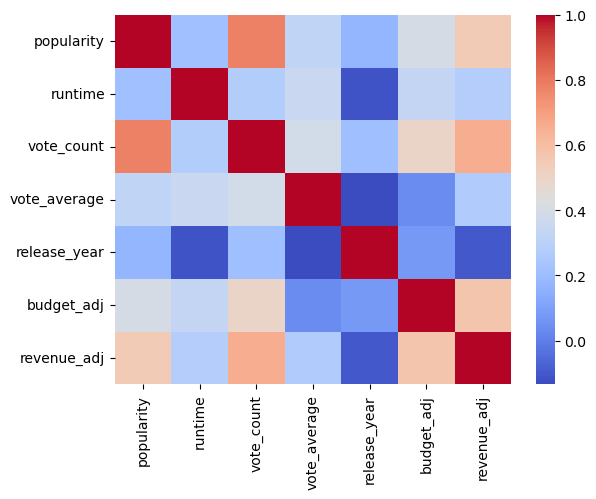

In [210]:
# using seaborn heatmap to visualise better the correlation between variables

sns.heatmap(df_rev.drop('id', axis=1).corr(), cmap='coolwarm');

The correlation and the heatmap above show that there is a clear positve correlation between 'vote_counts' and 'popularity' (correlation of 0.78).

In terms of adjusted revenue, there is a positive correlation approximately equal or a bit above 0.5 with 'popularity', 'vote_count' and 'budget_adj'. Positive correlation with runtime and vote_average is less significant (correlations of around 0.28 and 0.27 respectively).

The scatter plots below provide visualisations of various variables versus adjusted revenue.

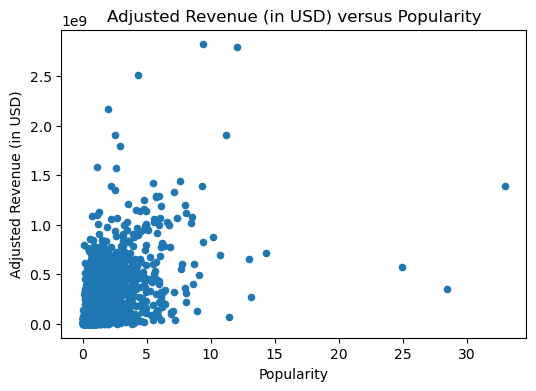

In [211]:
# scatterplot: adjusted revenue and popularity

df_rev.plot(x='popularity', y='revenue_adj', kind='scatter', figsize=(6,4))
plt.title('Adjusted Revenue (in USD) versus Popularity')
plt.xlabel('Popularity', fontsize=10)
plt.ylabel('Adjusted Revenue (in USD)', fontsize=10);

As seen from previous code, __correlation between 'adjusted revenue' and 'popularity' is positive but low-moderate, as just above 0.5. There seems to be a general positive correlation in the plot. However, for example, the three movies with the highest popularity ('jurassic world', 'mad max: fury road' and 'interstellar') do not have very high revenue(below 1.5e9 USD). The same seems true for the few samples with very high revenue ('avatar', 'star wars', 'titanic'): they have popularity below 15__.

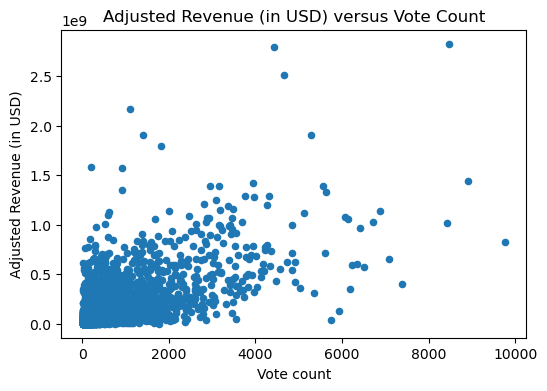

In [212]:
# scatterplot: adjusted revenue and vote count

df_rev.plot(x='vote_count', y='revenue_adj', kind='scatter', figsize=(6,4))
plt.title('Adjusted Revenue (in USD) versus Vote Count')
plt.xlabel('Vote count', fontsize=10)
plt.ylabel('Adjusted Revenue (in USD)', fontsize=10);

As seen from previous code, __correlation between 'adjusted revenue' and 'vote count' is positive and of approximately 0.65. We can see from the scatter plot that there are generally more vote counts for the movies with higher revenues__.

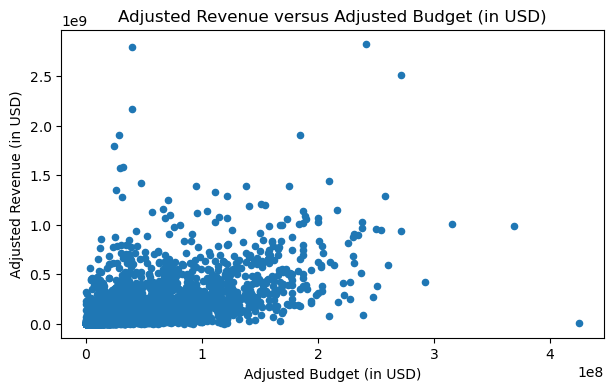

In [213]:
# scatterplot: adjusted revenue and adjusted budget

df_rev.plot(x='budget_adj', y='revenue_adj', kind='scatter', figsize=(7,4))
plt.title('Adjusted Revenue versus Adjusted Budget (in USD)')
plt.xlabel('Adjusted Budget (in USD)', fontsize=10)
plt.ylabel('Adjusted Revenue (in USD)', fontsize=10);

As seen from previous code, __correlation between 'adjusted revenue' and 'adjusted budget' is positive, a low-moderate value of approximately 0.57. From the scatter plot we can see a general trend so that revenue increases with budget. However, for example, the three samples with highest budget have a revenue below 1.5e9 USD and there is a movie with a very high revenue above 2.5e9 USD but budget below 0.5e8 USD__.

The correlation and heatmap showed low positive correlations with runtime and vote_average. The two scatterplots below provide visualisations:

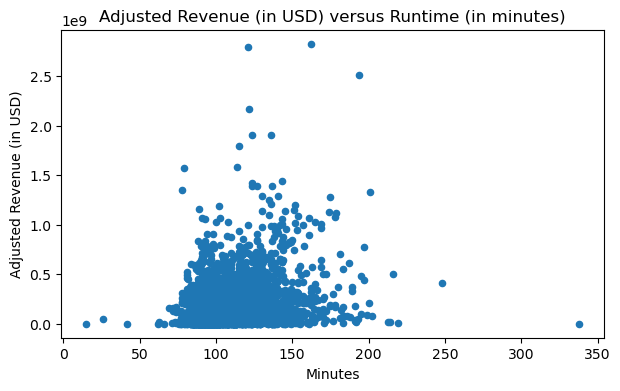

In [214]:
# scatterplot: adjusted revenue and runtime

df_rev.plot(x='runtime', y='revenue_adj', kind='scatter', figsize=(7,4))
plt.title('Adjusted Revenue (in USD) versus Runtime (in minutes)')
plt.xlabel('Minutes', fontsize=10)
plt.ylabel('Adjusted Revenue (in USD)', fontsize=10);

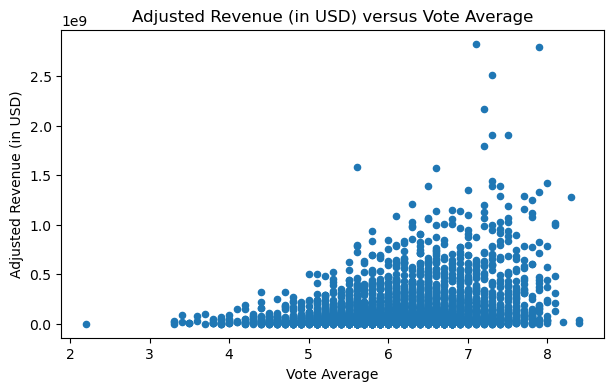

In [215]:
# scatterplot: adjusted revenue and vote average

df_rev.plot(x='vote_average', y='revenue_adj', kind='scatter', figsize=(7,4))
plt.title('Adjusted Revenue (in USD) versus Vote Average')
plt.xlabel('Vote Average', fontsize=10)
plt.ylabel('Adjusted Revenue (in USD)', fontsize=10);

__Besides the low positive correlation value, the scatterplot of revenue versus vote average highlights that the movies with heighest revenue (revenue above 1.7e9 USD) have also high votes (between 7 and 8). However, the few movies with votes above/equal 8 do not seem to have high revenues__. 

#### Investigating properties of high revenue movies (defining revenue level categories)

To investigate more the properties of movies with high revenues, I define some revenue categories, based on descriptive statistics values.

In [216]:
df_rev['revenue_adj'].describe()

count    3.854000e+03
mean     1.370647e+08
std      2.161114e+08
min      2.370705e+00
25%      1.835735e+07
50%      6.173068e+07
75%      1.632577e+08
max      2.827124e+09
Name: revenue_adj, dtype: float64

In [217]:
# use values of min,25%, 50%, 75%, max to define a list of bin edges
# and define names of revenue categories

bin_edges = [2.370705e+00, 1.835735e+07, 6.173068e+07, 1.632577e+08, 2.827124e+09]
categ_names = ['Low', 'Mid', 'High', 'Very High']

In [218]:
# using pd.cut() to create the revenue_level column

df_rev['revenue_level'] = pd.cut(df_rev['revenue_adj'], bins=bin_edges, labels=categ_names)

In [219]:
# check
df_rev.head()

,id,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,revenue_level
0,135397,32.985763,jurassic world,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Very High
1,76341,28.419936,mad max: fury road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,Very High
2,262500,13.112507,insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08,Very High
3,140607,11.173104,star wars: the force awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09,Very High
4,168259,9.335014,furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09,Very High


In [220]:
# check number of movies for each revenue level:

df_rev.groupby('revenue_level')['id'].count()

revenue_level
Low          964
Mid          963
High         963
Very High    964
Name: id, dtype: int64

In [221]:
# look at statistics for each revenue level, using groupby:

df_rev.drop('id', axis=1).groupby('revenue_level').mean()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
revenue_level,,,,,,,
Low,0.559361,103.214730,121.131743,5.958299,2003.884855,1.599161e+07,6.504637e+06
Mid,0.808519,106.404984,251.193146,6.066355,2000.951194,2.947073e+07,3.693732e+07
High,1.148874,109.597092,446.977155,6.188681,2000.658359,4.449050e+07,1.020595e+08
Very High,2.249021,117.661826,1291.208506,6.459232,1999.548755,8.699208e+07,4.026172e+08


In [222]:
# save it as dataframe for visualisations

df_revlev_mean = df_rev.drop('id', axis=1).groupby('revenue_level').mean()

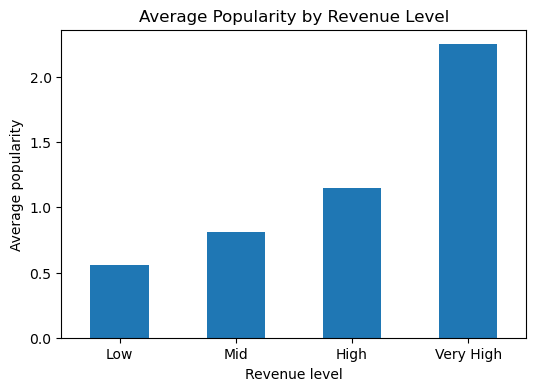

In [223]:
# average popularity for each revenue level

df_revlev_mean['popularity'].plot(kind='bar', title='Average Popularity by Revenue Level', figsize=(6,4))
plt.xlabel('Revenue level', fontsize=10,)
plt.xticks(rotation=0)
plt.ylabel('Average popularity', fontsize=10);

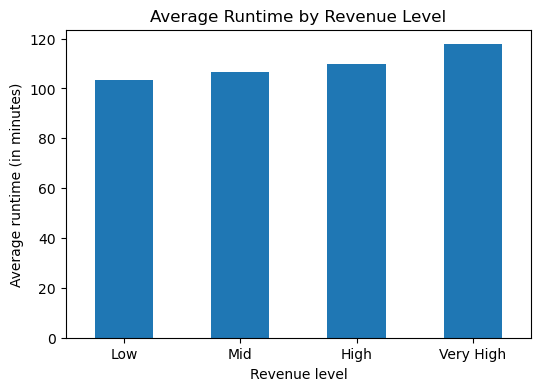

In [224]:
# average runtime for each revenue level

df_revlev_mean['runtime'].plot(kind='bar', title='Average Runtime by Revenue Level', figsize=(6,4))
plt.xlabel('Revenue level', fontsize=10)
plt.xticks(rotation=0)
plt.ylabel('Average runtime (in minutes)', fontsize=10);

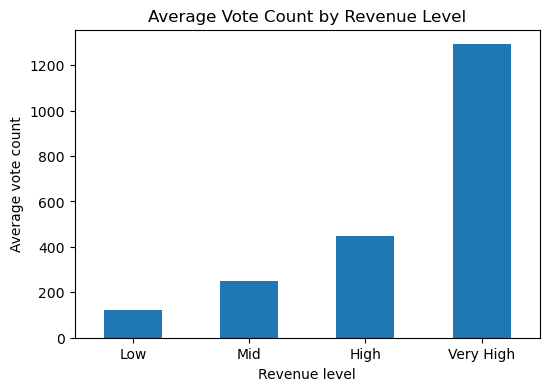

In [225]:
# average vote count for each revenue level

df_revlev_mean['vote_count'].plot(kind='bar', title='Average Vote Count by Revenue Level', figsize=(6,4))
plt.xlabel('Revenue level', fontsize=10)
plt.xticks(rotation=0)
plt.ylabel('Average vote count', fontsize=10);

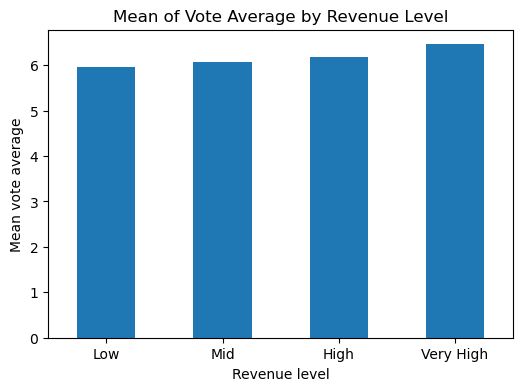

In [226]:
# average vote average for each revenue level

df_revlev_mean['vote_average'].plot(kind='bar', title='Mean of Vote Average by Revenue Level', figsize=(6,4))
plt.xlabel('Revenue level', fontsize=10)
plt.xticks(rotation=0)
plt.ylabel('Mean vote average', fontsize=10);

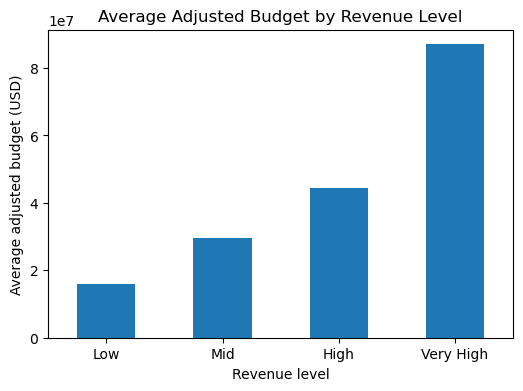

In [227]:
# average adjusted budget for each revenue level

df_revlev_mean['budget_adj'].plot(kind='bar', title='Average Adjusted Budget by Revenue Level', figsize=(6,4))
plt.xlabel('Revenue level', fontsize=10)
plt.xticks(rotation=0)
plt.ylabel('Average adjusted budget (USD)', fontsize=10);

In this section of the project I created a new categorical column of revenue levels (low, mid, high and very high), which are based on descriptive statistical values of adjusted revenue (min, 25%, 50%, 75% and maximum). By grouping the data by revenue level and looking at the mean of the various features, __there is a clear increase in the means of popularity, vote count and adjusted budget with the increase in revenue level. There is also an increase in the means of runtime and vote average, although values are closer together__.

### Research Question 2: How did genre popularity change over the years? 
In this part of the report, I will focus on genres and try to understand which ones became more popular over the years. 

One of the challenges is that, as previously seen, the column genre has strings of one or more genres separated by the character pipe '|'.

In [228]:
# create a copy of dataframe for research 2 question analysis:

df_genres = df.copy()

In [229]:
# check
df_genres.shape

(10865, 14)

In [230]:
df_genres.head(3)

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,jurassic world,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,mad max: fury road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08


In [231]:
df_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10865 non-null  int64         
 1   popularity            10865 non-null  float64       
 2   original_title        10865 non-null  object        
 3   cast                  10789 non-null  object        
 4   director              10821 non-null  object        
 5   runtime               10865 non-null  int64         
 6   genres                10842 non-null  object        
 7   production_companies  9835 non-null   object        
 8   release_date          10865 non-null  datetime64[ns]
 9   vote_count            10865 non-null  int64         
 10  vote_average          10865 non-null  float64       
 11  release_year          10865 non-null  int64         
 12  budget_adj            10865 non-null  float64       
 13  revenue_adj     

I will __keep only columns 'genres', 'popularity', 'release_year', 'vote_average' (needed for this research question analysis) and 'id', 'original_title' and 'director' (kept as identifier/description of movie)__.

In [232]:
# drop columns:
cols_to_drop2 = ['cast','runtime', 'production_companies', 'release_date', 'vote_count', 'budget_adj', 'revenue_adj']
df_genres.drop(columns=cols_to_drop2, inplace=True)

In [233]:
# check new shape and info

df_genres.shape

(10865, 7)

In [234]:
df_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10865 non-null  int64  
 1   popularity      10865 non-null  float64
 2   original_title  10865 non-null  object 
 3   director        10821 non-null  object 
 4   genres          10842 non-null  object 
 5   vote_average    10865 non-null  float64
 6   release_year    10865 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 679.1+ KB


In [235]:
# checking number of null values

df_genres.isnull().sum()

id                 0
popularity         0
original_title     0
director          44
genres            23
vote_average       0
release_year       0
dtype: int64

There are only __23 missing values in the 'genres' column__. Looking to other sources for this information is beyond the scope of this project. Due to the limited number of missing values, __I will drop these rows__.

There are other __missing values in the 'director' column__, but I am not using this one for analysis. I am keeping this column just as identifier/descriptor of a movie. Therefore I will __fill those missing values with string 'missing information'__.

In [236]:
df_genres.dropna(subset=['genres'], inplace=True)

In [237]:
df_genres.fillna('missing information', inplace=True)

In [238]:
# check

df_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10842 non-null  int64  
 1   popularity      10842 non-null  float64
 2   original_title  10842 non-null  object 
 3   director        10842 non-null  object 
 4   genres          10842 non-null  object 
 5   vote_average    10842 non-null  float64
 6   release_year    10842 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 677.6+ KB


As previusly seen, the column 'genres' contains strings with one or more genres separated by pipe character '|'.

In the question/answer mentor help forum regarding how to deal with the 'genres' column in Udacity classroom, there is reference to using .split() and then .explode() to obtain one row for each genre. They refer to the method 3 explained in this page [Pandas explode column to rows](https://medium.com/analytics-vidhya/pandas-explode-b162e7a85d3f).

In [239]:
# use pandas explode for the genres column
# in order to obtain a different row for each of the genres in the original cell separted by pipe

df_genres = df_genres.assign(genres=df_genres['genres'].str.split('|')).explode('genres')

In [240]:
# check
df_genres.shape

(26955, 7)

In [241]:
df_genres.head(10)

,id,popularity,original_title,director,genres,vote_average,release_year
0,135397,32.985763,jurassic world,Colin Trevorrow,Action,6.5,2015
0,135397,32.985763,jurassic world,Colin Trevorrow,Adventure,6.5,2015
0,135397,32.985763,jurassic world,Colin Trevorrow,Science Fiction,6.5,2015
0,135397,32.985763,jurassic world,Colin Trevorrow,Thriller,6.5,2015
1,76341,28.419936,mad max: fury road,George Miller,Action,7.1,2015
1,76341,28.419936,mad max: fury road,George Miller,Adventure,7.1,2015
1,76341,28.419936,mad max: fury road,George Miller,Science Fiction,7.1,2015
1,76341,28.419936,mad max: fury road,George Miller,Thriller,7.1,2015
2,262500,13.112507,insurgent,Robert Schwentke,Adventure,6.3,2015
2,262500,13.112507,insurgent,Robert Schwentke,Science Fiction,6.3,2015


The .split('|').explode() code above allowed to create a __different row for each genre__, increasing the size of the dataframe to 26955 rows.
It has to be noted that this causes to have more rows for the same movie. So it is appropriate for an analyisis of this second research question, but may not for other topics, such as research question 1.

In [242]:
# looking at genres

df_genres['genres'].unique()

array(['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy',
       'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy',
       'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror',
       'Documentary', 'TV Movie', 'Foreign'], dtype=object)

In order to obtain the most popular genre for each year, I have firstly to group by 'release_year' and 'genres' and look at the mean of 'popularity'.

In [243]:
# group by year and genre and look at mean of popularity

df_genre_grouped = df_genres.groupby(['release_year','genres'])['popularity'].mean()
df_genre_grouped

release_year  genres         
1960          Action             0.590724
              Adventure          0.700981
              Comedy             0.396000
              Crime              0.346479
              Drama              0.566305
                                   ...   
2015          Science Fiction    2.245603
              TV Movie           0.260574
              Thriller           1.401877
              War                1.284511
              Western            3.178796
Name: popularity, Length: 1049, dtype: float64

As example, I will look at the __popularity of all genres for specific years (1960, 1980, 2000, 2015)__.

In [244]:
# create dataframe with the three columns:

df_genre_y = df_genre_grouped.to_frame().reset_index()
df_genre_y

,release_year,genres,popularity
0,1960,Action,0.590724
1,1960,Adventure,0.700981
2,1960,Comedy,0.396000
3,1960,Crime,0.346479
4,1960,Drama,0.566305
...,...,...,...
1044,2015,Science Fiction,2.245603
1045,2015,TV Movie,0.260574
1046,2015,Thriller,1.401877
1047,2015,War,1.284511


In [251]:
# function to select a specific year and plot average popularity by genre (sorting by popularity)

def pop_genre_by_year(my_year):
    
    # filter the dataframe to keep only the wanted year
    df_genre_my_year = df_genre_y[df_genre_y['release_year'] == my_year].sort_values(by='popularity', ascending=False)
    my_year_str = str(my_year)
    
    # barplot:
    plt.figure(figsize=(10,4))
    sns.barplot(x='genres', y='popularity', data=df_genre_my_year)
    plt.title('Average popularity by genre in '+my_year_str)
    plt.xticks(rotation=90); 

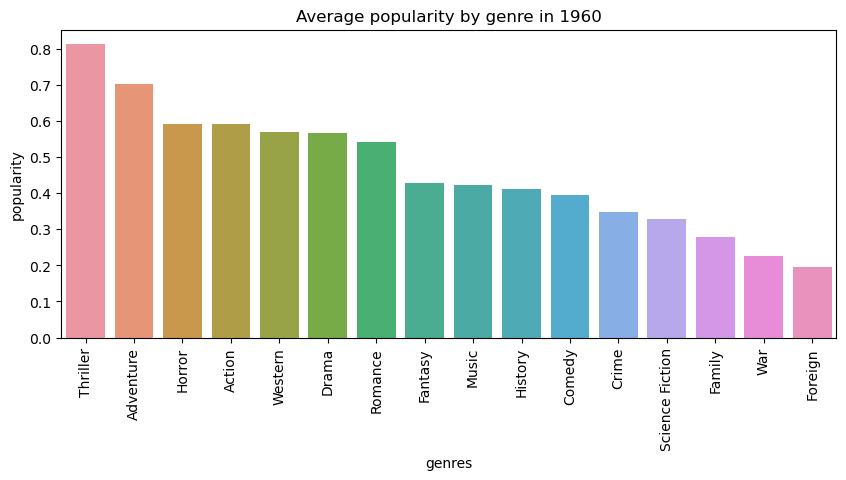

In [252]:
pop_genre_by_year(1960)

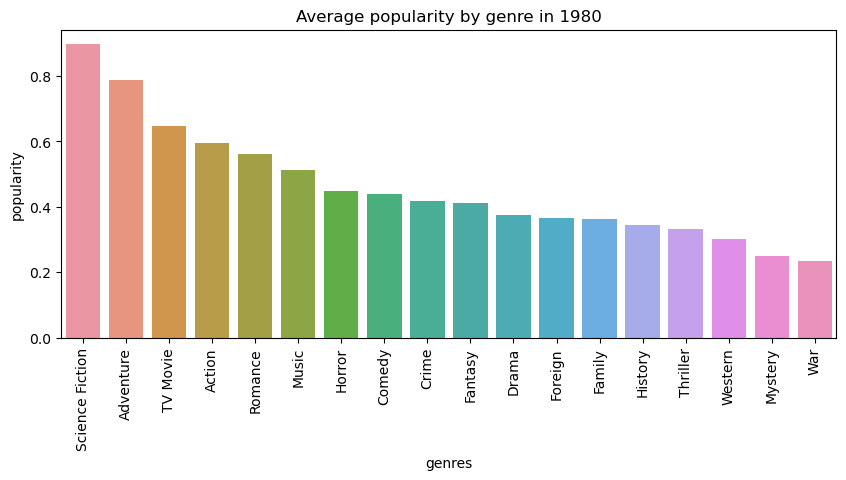

In [253]:
pop_genre_by_year(1980)

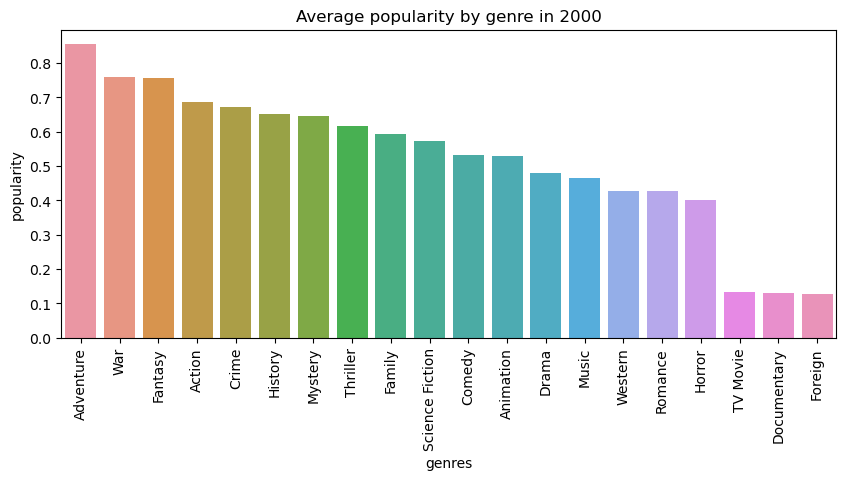

In [254]:
pop_genre_by_year(2000)

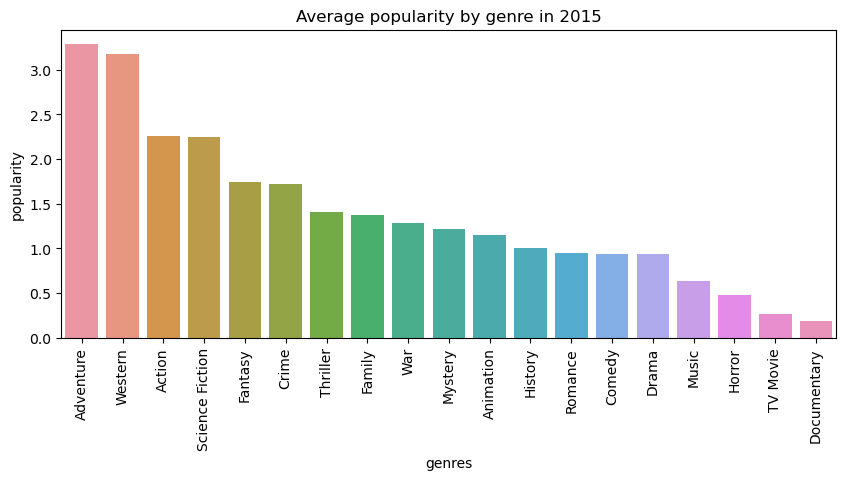

In [255]:
pop_genre_by_year(2015)

__The plots above show as example the average popularity of all genres for the years 1960, 1980, 2000 and 2015. We can see that there is some variability between those years__. For example the genre 'Adventure' was firs or second most popular. However, 'Thriller' was the most popular in 1960 but ranked 15th, 8th and 7th in the other years. Or 'Science Fiction' is very variate in ranking.

Here below I will select __the 8 most popular genres of 2015 and look at their popularity over the years__.

In [256]:
# lists containing only the 8 genres which were most popular in 2015

genres_list_a = ['Adventure', 'Western', 'Action', 'Science Fiction']
genres_list_b = ['Fantasy', 'Crime', 'Thriller', 'Family']


In [257]:
# function for seaborn lineplot to show popularity of genres over the years

def my_lineplot(my_genres_list):
    
    # filter dataframe to contain only wanted genres:
    my_dataframe = df_genre_y[df_genre_y['genres'].isin(my_genres_list)]
    
    # create lineplot
    plt.figure(figsize=(10,4))
    sns.set_style("darkgrid")
    sns.lineplot(data=my_dataframe, x='release_year', y='popularity', hue='genres')
    plt.title('Average popularity of genres over the years 1960-2015')
    plt.xlabel('Release year')
    plt.ylabel('Average popularity')
    plt.ylim(0,3.5)
    plt.legend(loc='upper left', fontsize=8);

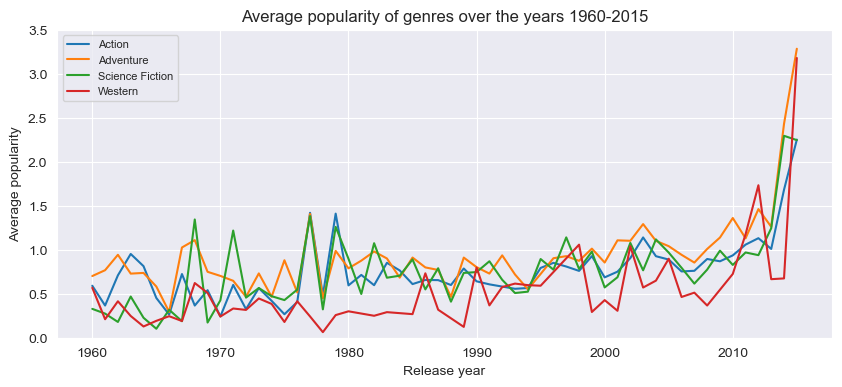

In [258]:
my_lineplot(genres_list_a)

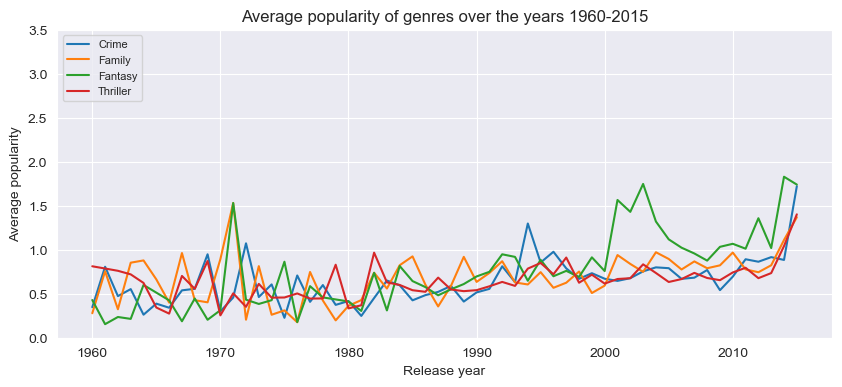

In [259]:
my_lineplot(genres_list_b)

In order to select only the genre with the highest value of popularity for each year out of the groupby dataframe, I relied on suggestions by Udacity mentor found in the Udacity mentor q/a forum pages (suggestion implies doing a second groupby and reset_index, as shown in code below).

In [260]:
# I want to select for each year only the genre with highest mean popularity
# need to groupby again
# and tidy up the row index with reset_index as otherwise I have 'release_year' twice
# (using level 0 as name is the same)

df_genre_grouped2 = df_genre_grouped.to_frame().groupby(level='release_year')['popularity'].nlargest(1).reset_index(level=0, drop=True).reset_index()
df_genre_grouped2

,release_year,genres,popularity
0,1960,Thriller,0.811910
1,1961,Animation,2.631987
2,1962,Adventure,0.942513
3,1963,Animation,2.180410
4,1964,War,0.930959
5,1965,Music,0.968850
6,1966,Animation,0.585717
7,1967,Animation,1.348805
8,1968,Mystery,1.519456
9,1969,Crime,0.948020


__The table above shows the genre with highest average popularity for each year__. For example the genre 'Fantasy' was the most popular during the years 2001-2007 and previously only in 1993. For the most recent years, the genre adventure was very popular for several years (1999-2000, 2008-2010 and 2013-2015). The genre thriller was instead the most popular only in 1960. Some genres, such as comedy, romance, horror or documentary never appear in the table. 

Instead of mean popularity, I could repeat the same investigation looking at genres in terms of 'vote_average'.

In [261]:
# group by year and genre -- now looking at vote_average instead of popularity

df_genre_grouped_va = df_genres.groupby(['release_year','genres'])['vote_average'].mean()
df_genre_grouped_va

release_year  genres         
1960          Action             6.050000
              Adventure          6.680000
              Comedy             6.312500
              Crime              5.900000
              Drama              6.276923
                                   ...   
2015          Science Fiction    5.682558
              TV Movie           6.100000
              Thriller           5.471345
              War                6.222222
              Western            6.316667
Name: vote_average, Length: 1049, dtype: float64

In [262]:
# I want to select for each year only the genre with highest mean vote average

df_genre_grouped_va2 = df_genre_grouped_va.to_frame().groupby(level='release_year')['vote_average'].nlargest(1).reset_index(level=0, drop=True).reset_index()
df_genre_grouped_va2

,release_year,genres,vote_average
0,1960,Family,7.033333
1,1961,Mystery,6.800000
2,1962,Western,6.833333
3,1963,War,7.500000
4,1964,War,7.033333
5,1965,Animation,7.600000
6,1966,Documentary,7.400000
7,1967,War,7.200000
8,1968,Mystery,7.200000
9,1969,Crime,6.833333


__The table above shows which genres obtained the highest mean vote average for each year__. It is interesting to see how the genre documentary is often the most rated. From the year 1984, there are only a few exceptions (in 1986-7, 1997-8, 2002, 2010, 2012).

<a id='conclusions'></a>
## Conclusions

#### Research question 1: What kind of properties are associated with the movies that have high revenues?

The provided data contained many rows with zeros in adjusted revenue and budget columns, which were considered errors. Finding the correct values from other sources was considered beyond the scope of this Udacity project. As using mean/median would have introduced errors in the results, I decided to drop such rows. This operation reduced significantly the number of movies in the dataframe (from 10865 to 3854).
The provided data contained also rows with very low budget and revenue values (below 10 USD), which should have been checked as probably wrong, but for the purpose of this exercise have been considered correct.

As from visualisations provided above, the distribution of adjusted revenue is clearly skewed to the right, with a median value of 61730679 USD and a maximum of 2827124000 USD.

The five movies with highest revenue are:
1.	Avatar by James Cameron
2.	Star Wars by George Lucas
3.	Titanic by James Cameron
4.	The exorcist by William Friedkin
5.	Jaws by Steven Spielberg

while the movie with the lowest revenue is ‘Shattered glass’ by Billy Ray.

Visualisation and correlations of numerical variables versus adjusted revenue were carried out. Data were also divided in levels of revenue and analysed in terms of descriptive statistics for each revenue category. Analysis and visualisations suggest that revenue generally increases with increase in popularity, vote counts, vote average, runtime and adjusted budget.

However, to draw more accurate conclusions inferential statistics and machine learning methods would be necessary and have not been used here.

#### Research question 2: How did genre popularity change over the years?

An analysis of genres required the splitting of this column based on pipe character, creating a row for each genre. The rows with missing values for genre were dropped as only a few samples and sourcing such information was beyond the scope of this Udacity project.

There is a clear variability in genre popularity over the years and line plots of popularity versus year were provided above for the eight most popular genres of 2015.

A table of the most popular genre for each year was also included. For example the genre ‘Fantasy’ was the most popular in 1993 and then for all the years between 2001 and 2007. The genre ‘Adventure’ was the most popular many times: in 1962, 1975, 1981, 1983, 1986, 1990, 1999, 2000 , 2008-10, 2013-15. Other genres instead, such as ‘Comedy’, ‘Romance’, ‘Horror’ and ‘Documentary’ never appear in such list.

Interestingly, however, if instead of popularity we consider the genre with the highest mean of ‘vote_average’ for each year, the genre ‘Documentary’ appears the most. For example from 1984 to 2015 it has been the highest rated 25 years out of 32.
